# Investigating Controls on Earth's Surface Temperature
### Mini Project I
### Sean Becker, tuo01803@temple.edu

#### This notebook uses the Python Packages Matplotlib, Pandas, and Numpy. This packages are critical for the analysis and display of the supporting data.
#### The data includes 20 1-dimensional observational datasets and 2 1-dimensional experimental datasets. This includes 5 datasets on greenhouse gas concentrations, 3 files on carbon emmisions, 11 global average surface temperature datasets, and a NASA GISS- E2 model output coupled with observed data.

In [1]:
import pandas as pd                          #importing the packages required
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#configuration
%matplotlib inline                         
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6

In [3]:
# this cell of code will import the data files necessary for this analysis

#greenhouse gas data
CO2_MaunaLoa = pd.read_csv('./data/greenhouse_gases/CO2_MaunaLoa_TimeSeries.csv',parse_dates=['Date'])
CO2_NOAA = pd.read_csv('./data/greenhouse_gases/CO2_NOAA_TimeSeries.csv',parse_dates=['Date'])
CO2_WDCGG = pd.read_csv('./data/greenhouse_gases/CO2_WDCGG_TimeSeries.csv',parse_dates=['Date'])
NOAA_CH4 = pd.read_csv('./data/greenhouse_gases/NOAA_CH4.csv')
WDCGG_N2O = pd.read_csv('./data/greenhouse_gases/WDCGG_N2O.csv')

#carbon emission datasets
FF_em_by_type = pd.read_csv('./data/greenhouse_gases/Fossil_Fuel_Emission_By_Type.csv')
Global_C_Budget = pd.read_csv('./data/greenhouse_gases/Global_C_Budget_2022.csv')
Nation_FF_em = pd.read_csv('./data/greenhouse_gases/Nation_Fossil_Fuel_Emissions.csv')

#global average surface temp data
gmt_Berkeley_Earth = pd.read_csv('./data/temp/gmt_Berkeley_Earth.csv')
gmt_ERA5 = pd.read_csv('./data/temp/gmt_ERA5.csv')
gmt_GISTEMP =pd.read_csv('./data/temp/gmt_GISTEMP.csv')
gmt_HadCrut5 = pd.read_csv('./data/temp/gmt_HadCRUT5.csv')
gmt_JRA55 =pd.read_csv('./data/temp/gmt_JRA-55.csv')
gmt_NOAA_Global_Temp =pd.read_csv('./data/temp/gmt_NOAAGlobalTemp.csv')

#annual global surface temp data over land
lsat_Berkeley_Earth_Land = pd.read_csv('./data/temp/lsat_Berkeley_Earth_Land.csv')
lsat_CRUTEM5 = pd.read_csv('./data/temp/lsat_CRUTEM5.csv')

#annual global surface temp data over oceans
sst_ERSSTv5 =pd.read_csv('./data/temp/sst_ERSSTv5.csv')
sst_HadSST3 =pd.read_csv('./data/temp/sst_HadSST3.csv')
sst_HadSST4 =pd.read_csv('./data/temp/sst_HadSST4.csv')

#model output
NASA_GISS_Responce_To_Forcings =pd.read_csv('./data/model_results/NASA_GISS_Response_To_Forcings.csv')
Observed_Temps =pd.read_csv('./data/model_results/Observed_Temps.csv')

In [4]:
# Not all the data has a convenient "date" category, so we need to set up the data for that in this cell
Calender_Date_NOAA_CH4 = pd.to_datetime(NOAA_CH4[['Year', 'Month']].assign(day=1))
Calender_Date_WDCGG_N2O = pd.to_datetime(WDCGG_N2O[['Year','Month']].assign(day=1))

In [5]:
#attached the variable previously associated with year and month to the data, forming a new column that will display "date"
NOAA_CH4['Date'] = Calender_Date_NOAA_CH4
WDCGG_N2O['Date'] = Calender_Date_WDCGG_N2O

In [18]:
gmt_Berkeley_Earth_F = (gmt_Berkeley_Earth['Berkeley Earth (degC)'])*(9/5)+32 #this will be relevent later, to compare temp data in C to F

# <span style="color:red"> #1
#  <span style="color:blue"> What Makes a Stable Climate?
### Simply put, when inputs = outputs in the Earth system, climate will be stable.
Earth is constantly recieving an energy input from the sun. This energy, known as solar radiation, comes in the form of high energy, shortwave radiation. When it interacts with the planet, the Earth acts as a blackbody in that it absorbs that shortwave solar radiation, warms up, and then reemits energy as longwave radiation. So long as the system is in balance (inputs = outputs), climate will be steady and will always return to an "average" condition. For the Earth and Sun, the amount of energy that leaves the planet should be equivalent to the amount of energy that that Sun provides to the Earth. When this energy balance (or budget) becomes comprimised, the Earth can cool down (more energy escapes) ot warm up (less energy escapes). To understand how the Earth's energy budget is currently out of balance, it is critical to build up a comprehension of greenhouse gases and the role they play in climate change. 

#  <span style="color:red"> #2
# <span style="color:blue"> Greenhouse Gases
The greenhouse effect is the retainment of thermal energy in the Earth system. This is caused by the atmosphere having a greater transparency to visible light, or shortwave radiation, than is has to infrared light, or longwave radiation. Greenhouse gases in the atmosphere are molecules that absorb and reemit the longwave/infrared radiation that comes from the Earths surface. In other words, shortwave radiation is able to enter the atmosphere uncontested, but greenhouse gases help to trap that energy in the system. The way that greenhouse gases do this is based on their molecular structure. Diatomic molecules, which only contain two atoms, have no contribution to the greenhouse effect. Molecules with more than two atoms, such as carbon dioxide, methane, nitrous oxide, and even water vapor, are the molecules that contribute to the greenhouse effect. They do this because with more bonds, and so more vibrational modes, they are more able to interact with infrared radiation and keep it trapped in the atmosphere. <br>
To some extent, the greenhouse effect is crucial for life on Earth to exist as it does. Without the greenhouse effect, the Earths surface would be over 30 degrees Celsius colder than it is. The problem arises when greenhouse gases increase in concentration, and an unbalanced greenhouse effect is the result. 

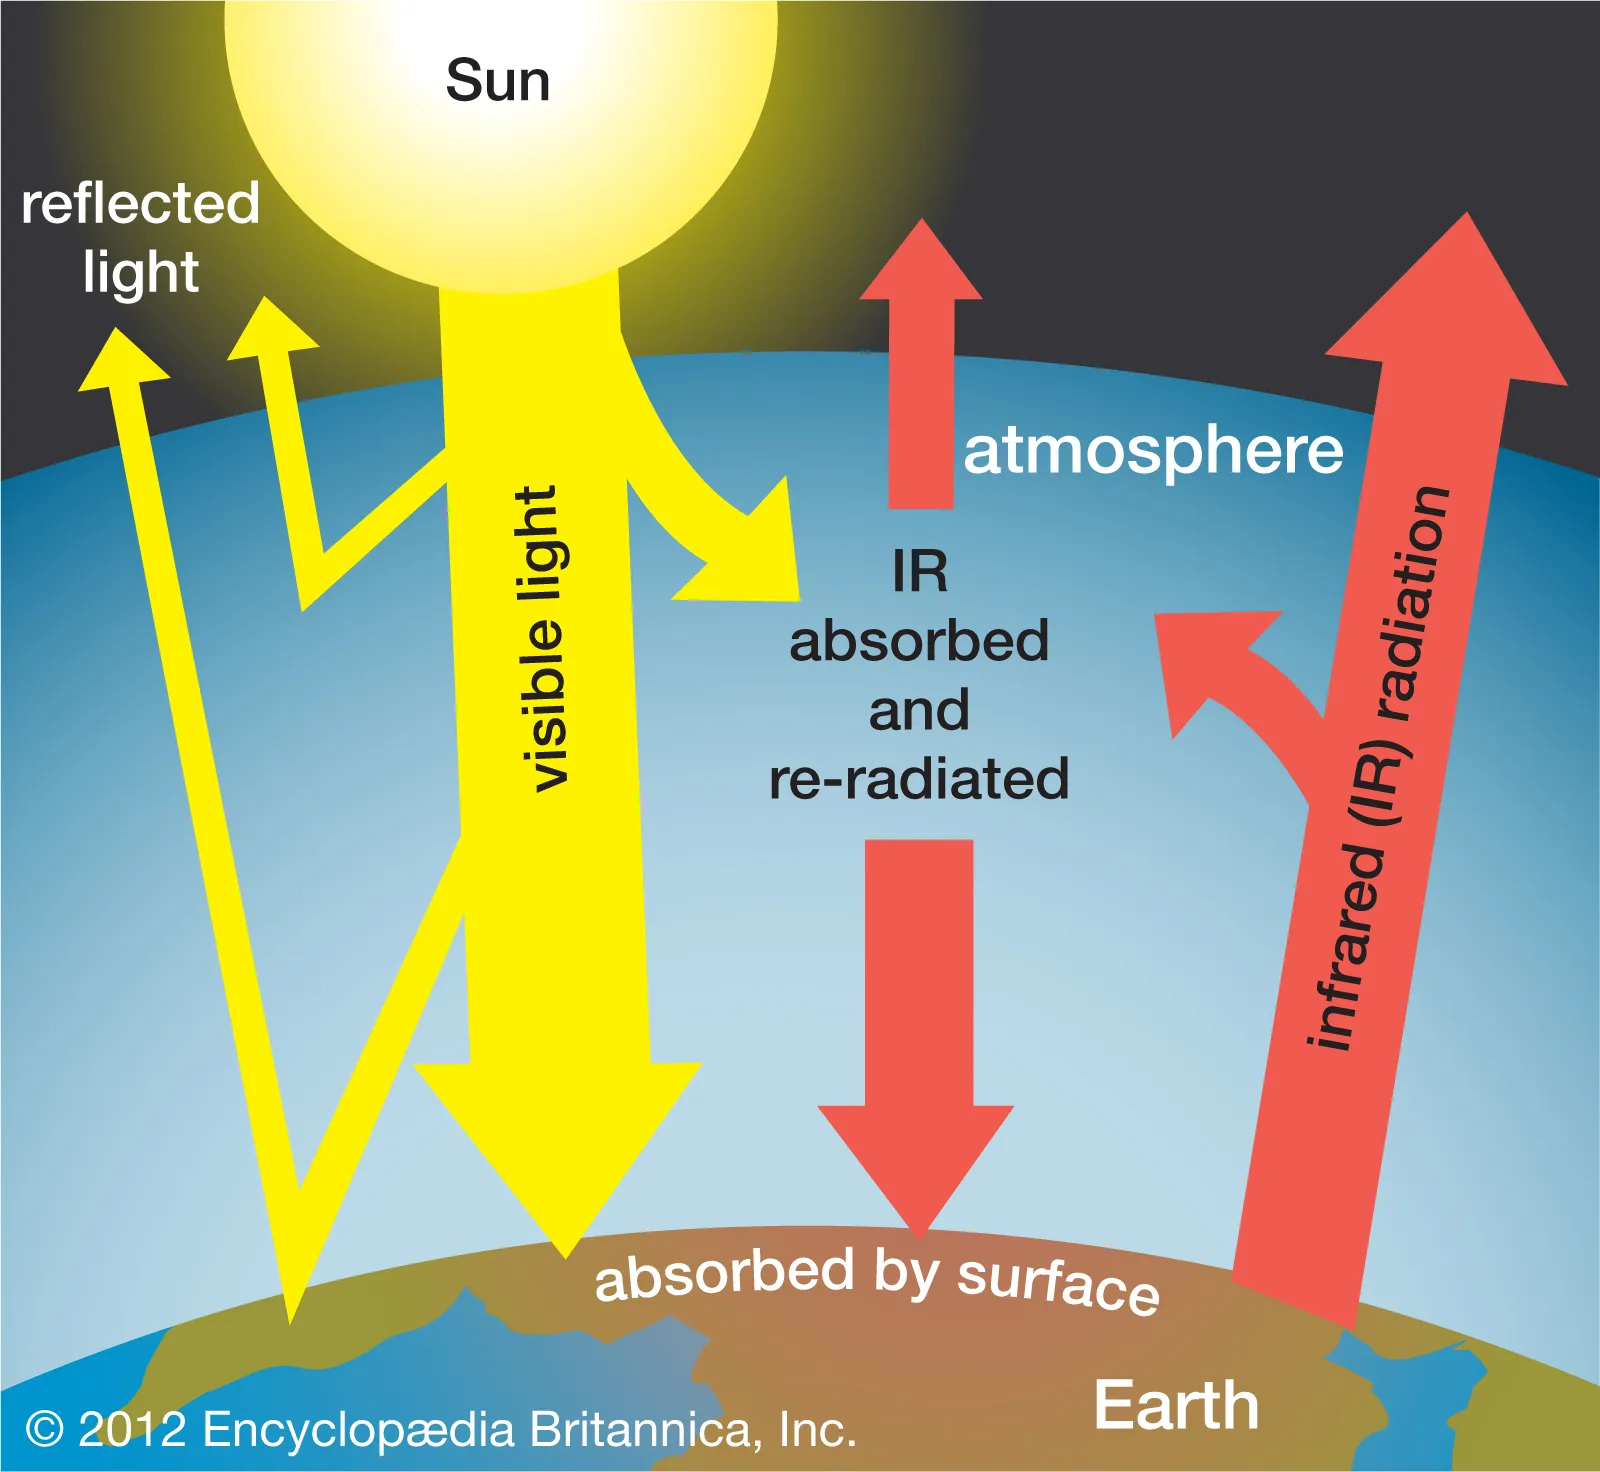
**Figure 1**: Simple diagram showing how solar energy enters and leaves the Earth's atmosphere. Greenhouse gases create the greenhouse effect by reemiting some of the infrared/shortwave radiation back to the Earth, when it would otherwise leave the planet in the form of infrared radiation. <br>
Source for image: https://www.britannica.com/science/greenhouse-effect

## <span style="color:blue">In the figures below, the relative concentrations of certain greenhouse gases are presented throughout the years.

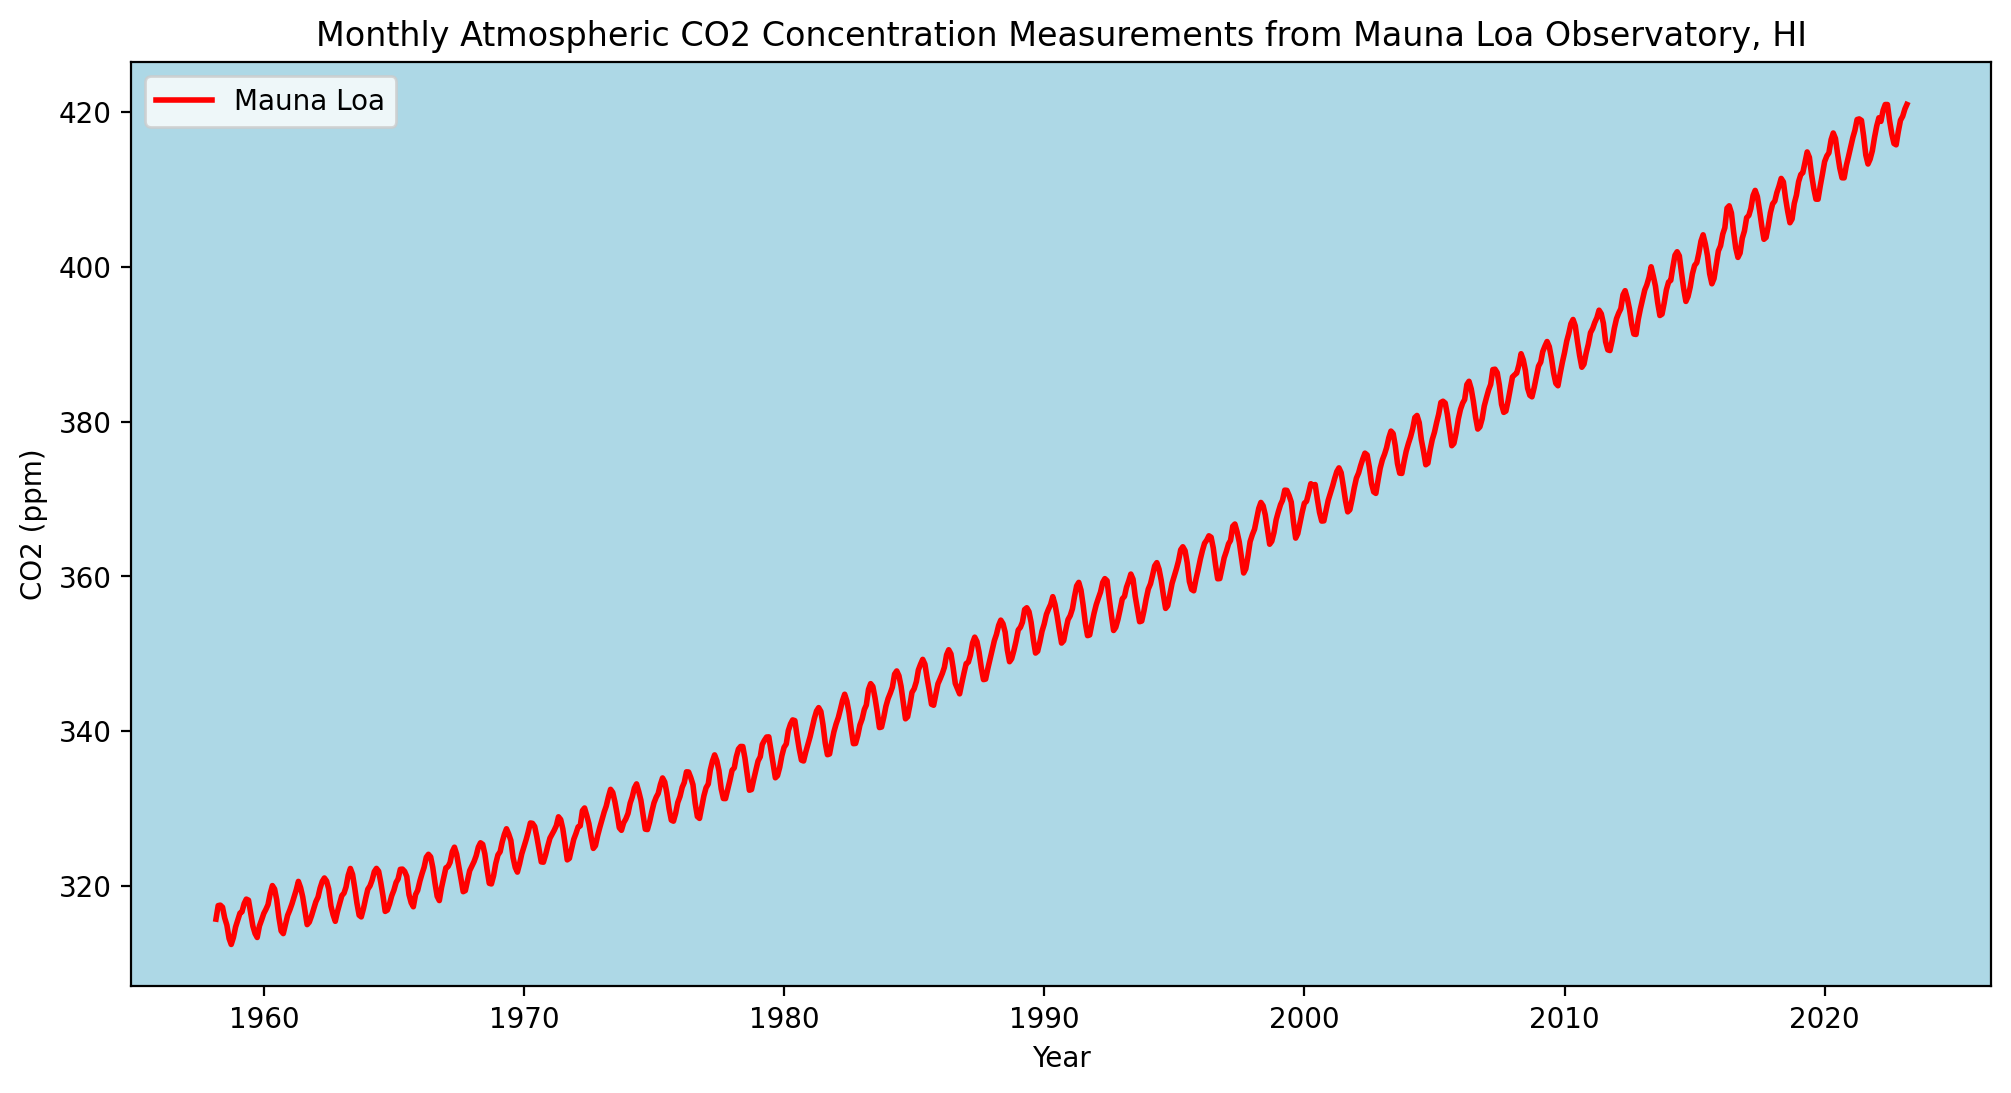

In [6]:
fig, ax = plt.subplots(figsize=(12,6))  #plot

ax.plot(CO2_MaunaLoa['Date'], #each ax.plot will plot of the graph defined above. fig and ax and ax.plot are important here. 
        CO2_MaunaLoa['Mauna Loa CO2 (ppm)'],
        linewidth = 2, label = 'Mauna Loa',
        color = 'red') #red for CO2 in individual graphs

#legend
ax.legend() 

# title
ax.set_title('Monthly Atmospheric CO2 Concentration Measurements from Mauna Loa Observatory, HI')

# axes labels
ax.set_ylabel('CO2 (ppm)')
ax.set_xlabel('Year')

#background color
ax.set_facecolor("lightblue")
       


**Figure 2**: Monthly atmospheric concentrations of CO2, measured by Mauna Loa Observatory in Hawaii. Carbon dioxide expressed in parts per million (ppm), which is its mole fraction in dry air. This data was collected over a period from March 1958 - March 2023. The trend of this data reveals a steady increase in carbon dioxide concentration, with some seasonal variation. <br>
Source: Keeling, Ralph F; Keeling, Charles D. (2017). Atmospheric Monthly 
In Situ CO2 Data - Mauna Loa Observatory, Hawaii (Archive 2023-06-04). I 
Scripps CO2 Program Data. UC San Diego Library Digital Collection .
https://doi.org/10.6075/J08W3BHW.

### <span style="color:blue"> In the graph above, the general upward trend is relatively clear to see. There is a lot of fluctuation though, and it seems like the CO2 levels rise and fall on a yearly cycle. By zooming in on the last five years of data and on a single year, the reason for that might become clearer.

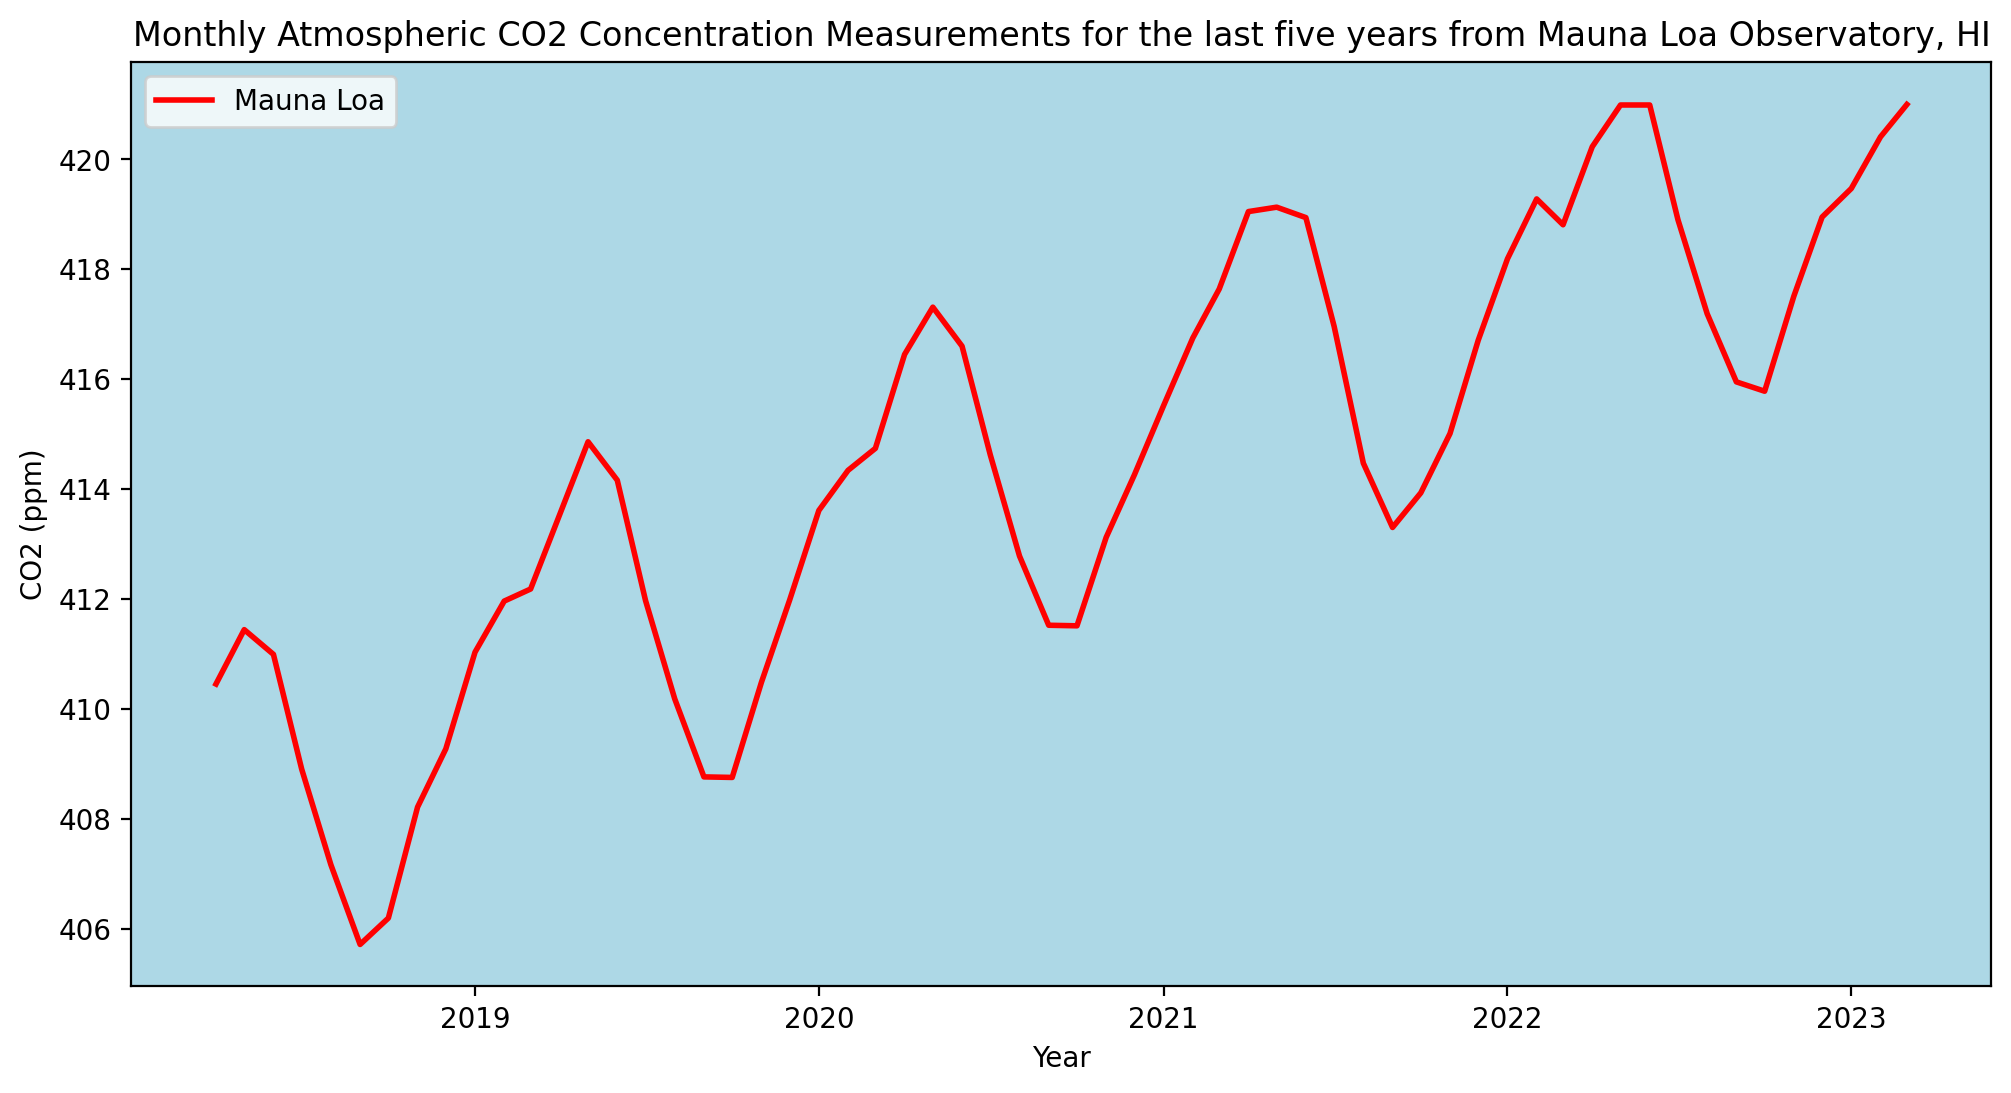

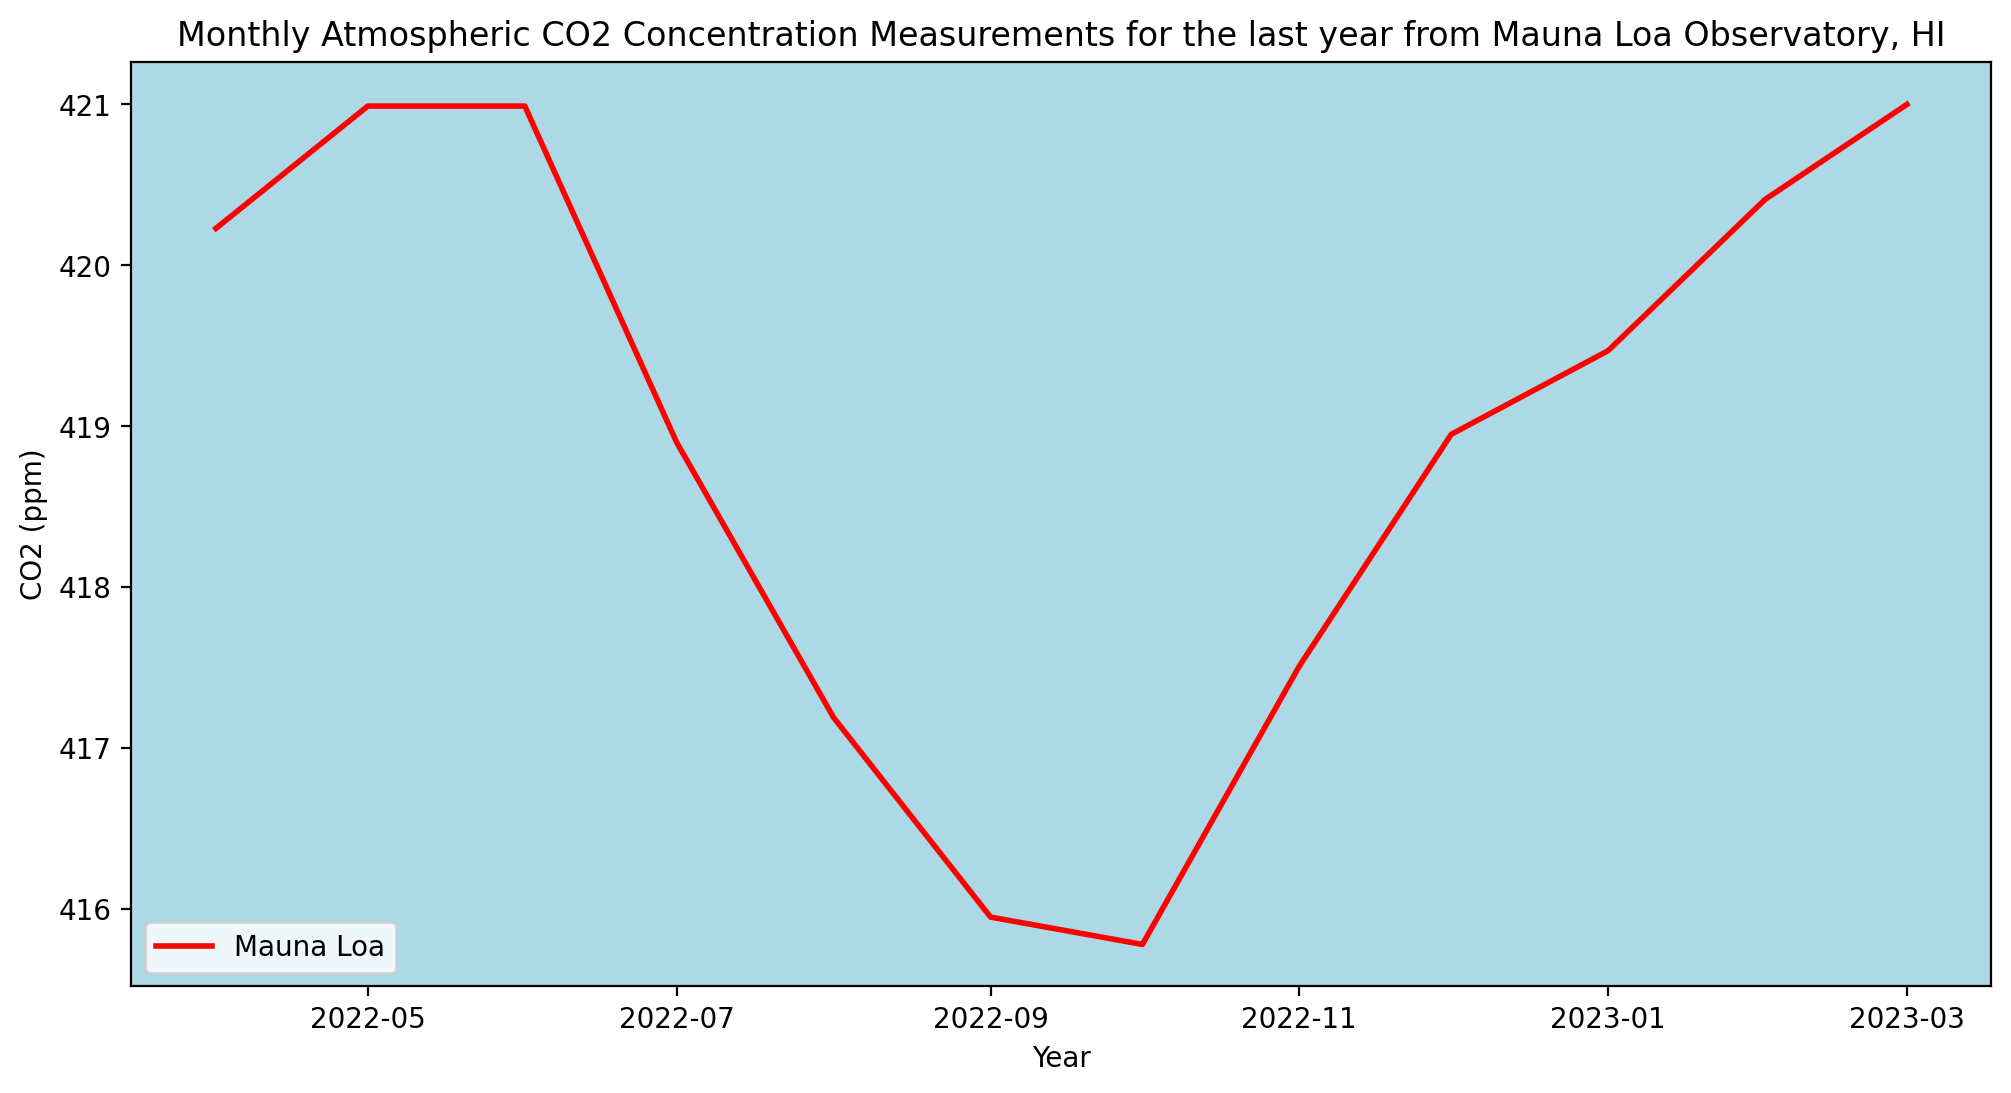

In [78]:
# to show the seasonal fluctuations over 5 years for the Mauna Loa data
fig, ax = plt.subplots(figsize=(12,6))  #plot

ax.plot(CO2_MaunaLoa.tail(60)['Date'], # The tail will allow us to plot the last 5 years (60 months) 
        CO2_MaunaLoa.tail(60)['Mauna Loa CO2 (ppm)'],
        linewidth = 2, label = 'Mauna Loa',
        color = 'red') #red for CO2 in individual graphs

#legend
ax.legend() 

# title
ax.set_title('Monthly Atmospheric CO2 Concentration Measurements for the last five years from Mauna Loa Observatory, HI')

# axes labels
ax.set_ylabel('CO2 (ppm)')
ax.set_xlabel('Year')

#background color
ax.set_facecolor("lightblue")

fig, ax = plt.subplots(figsize=(12,6))  #plot

ax.plot(CO2_MaunaLoa.tail(12)['Date'], # The tail will allow us to plot the last 5 years (60 months) 
        CO2_MaunaLoa.tail(12)['Mauna Loa CO2 (ppm)'],
        linewidth = 2, label = 'Mauna Loa',
        color = 'red') #red for CO2 in individual graphs

#legend
ax.legend() 

# title
ax.set_title('Monthly Atmospheric CO2 Concentration Measurements for the last year from Mauna Loa Observatory, HI')

# axes labels
ax.set_ylabel('CO2 (ppm)')
ax.set_xlabel('Year')

#background color
ax.set_facecolor("lightblue")

**Figure 3**: Subsets of the monthly atmospheric CO2 concentration data from Mauna Loa, Hawaii. The first graph depicts the CO2 concentrations over the last five years (March 2018- March 2023). The annual fluctuations are apparent, and the general trend of increased concentration is still reflected. The second graph slices further, and only presents measurements from the last twelve months (March 2022-March 2023). The overall trend is lost in this graph, but the seasonal variability is much more obvious. Concentration expressed in parts per million (ppm). <br>
Source: Keeling, Ralph F; Keeling, Charles D. (2017). Atmospheric Monthly 
In Situ CO2 Data - Mauna Loa Observatory, Hawaii (Archive 2023-06-04). I 
Scripps CO2 Program Data. UC San Diego Library Digital Collection .
https://doi.org/10.6075/J08W3BHW.

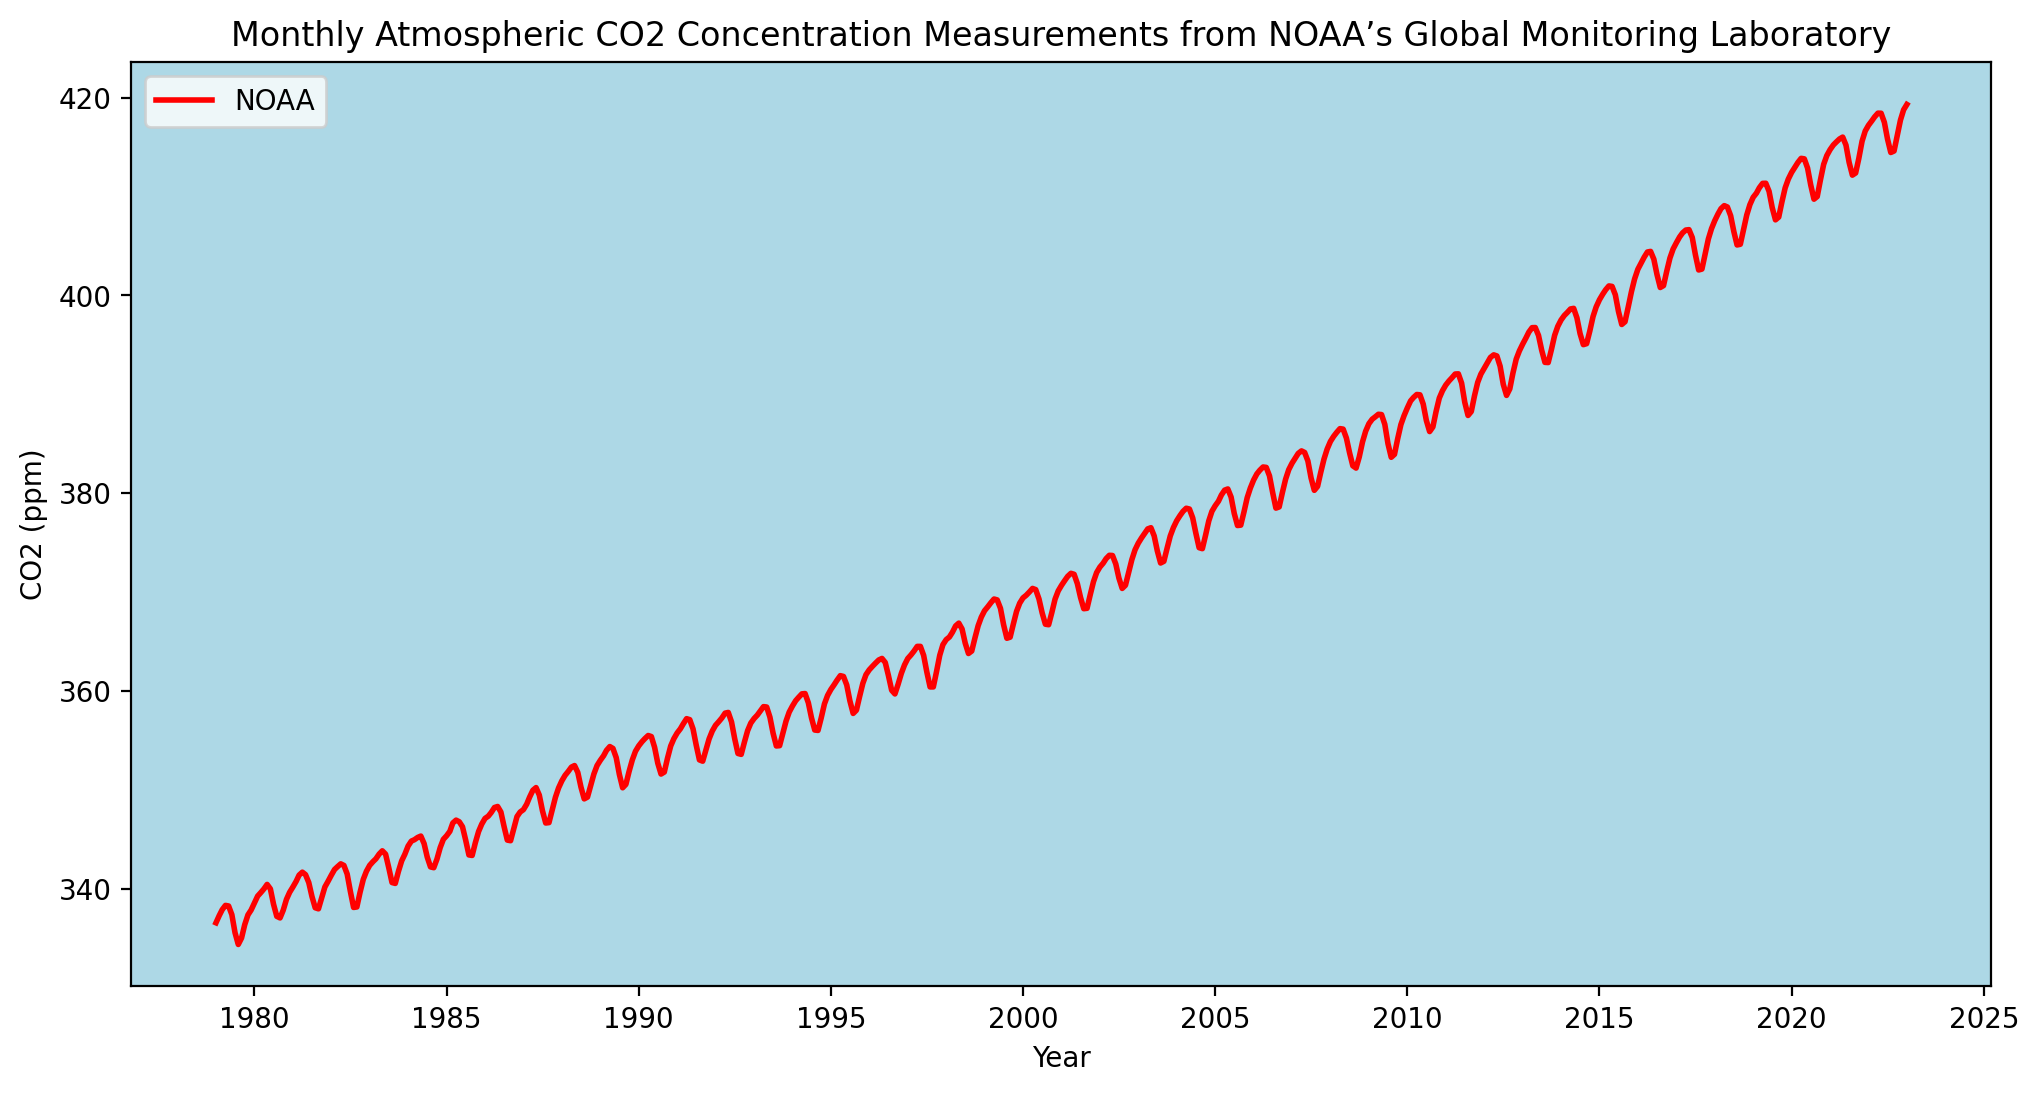

In [8]:
fig, ax = plt.subplots(figsize=(12,6))  #plot
ax.plot(CO2_NOAA['Date'],
        CO2_NOAA['NOAA CO2 (ppm)'],
        linewidth = 2, label = 'NOAA',
        color = 'red')
#legend
ax.legend() 

# title
ax.set_title('Monthly Atmospheric CO2 Concentration Measurements from NOAA’s Global Monitoring Laboratory')

# axes labels
ax.set_ylabel('CO2 (ppm)')
ax.set_xlabel('Year')

#background color
ax.set_facecolor("lightblue")

**Figure 4**: Monthly atmospheric concentrations of CO2, measured by NOAA's global monitoring laboratory over marine sites. Carbon dioxide expressed in parts per million (ppm), which is its mole fraction in dry air. This data was collected over a period from January 1979 – January 2023. The trend of this data reveals a steady increase in carbon dioxide concentration, with some seasonal variation.<br>
Source: Lan, X., Tans, P. and K.W. Thoning: Trends in globally-averaged CO2 determined from NOAA Global Monitoring Laboratory measurements. Version 2023-09. https://doi.org/10.15138/9N0H-ZH07

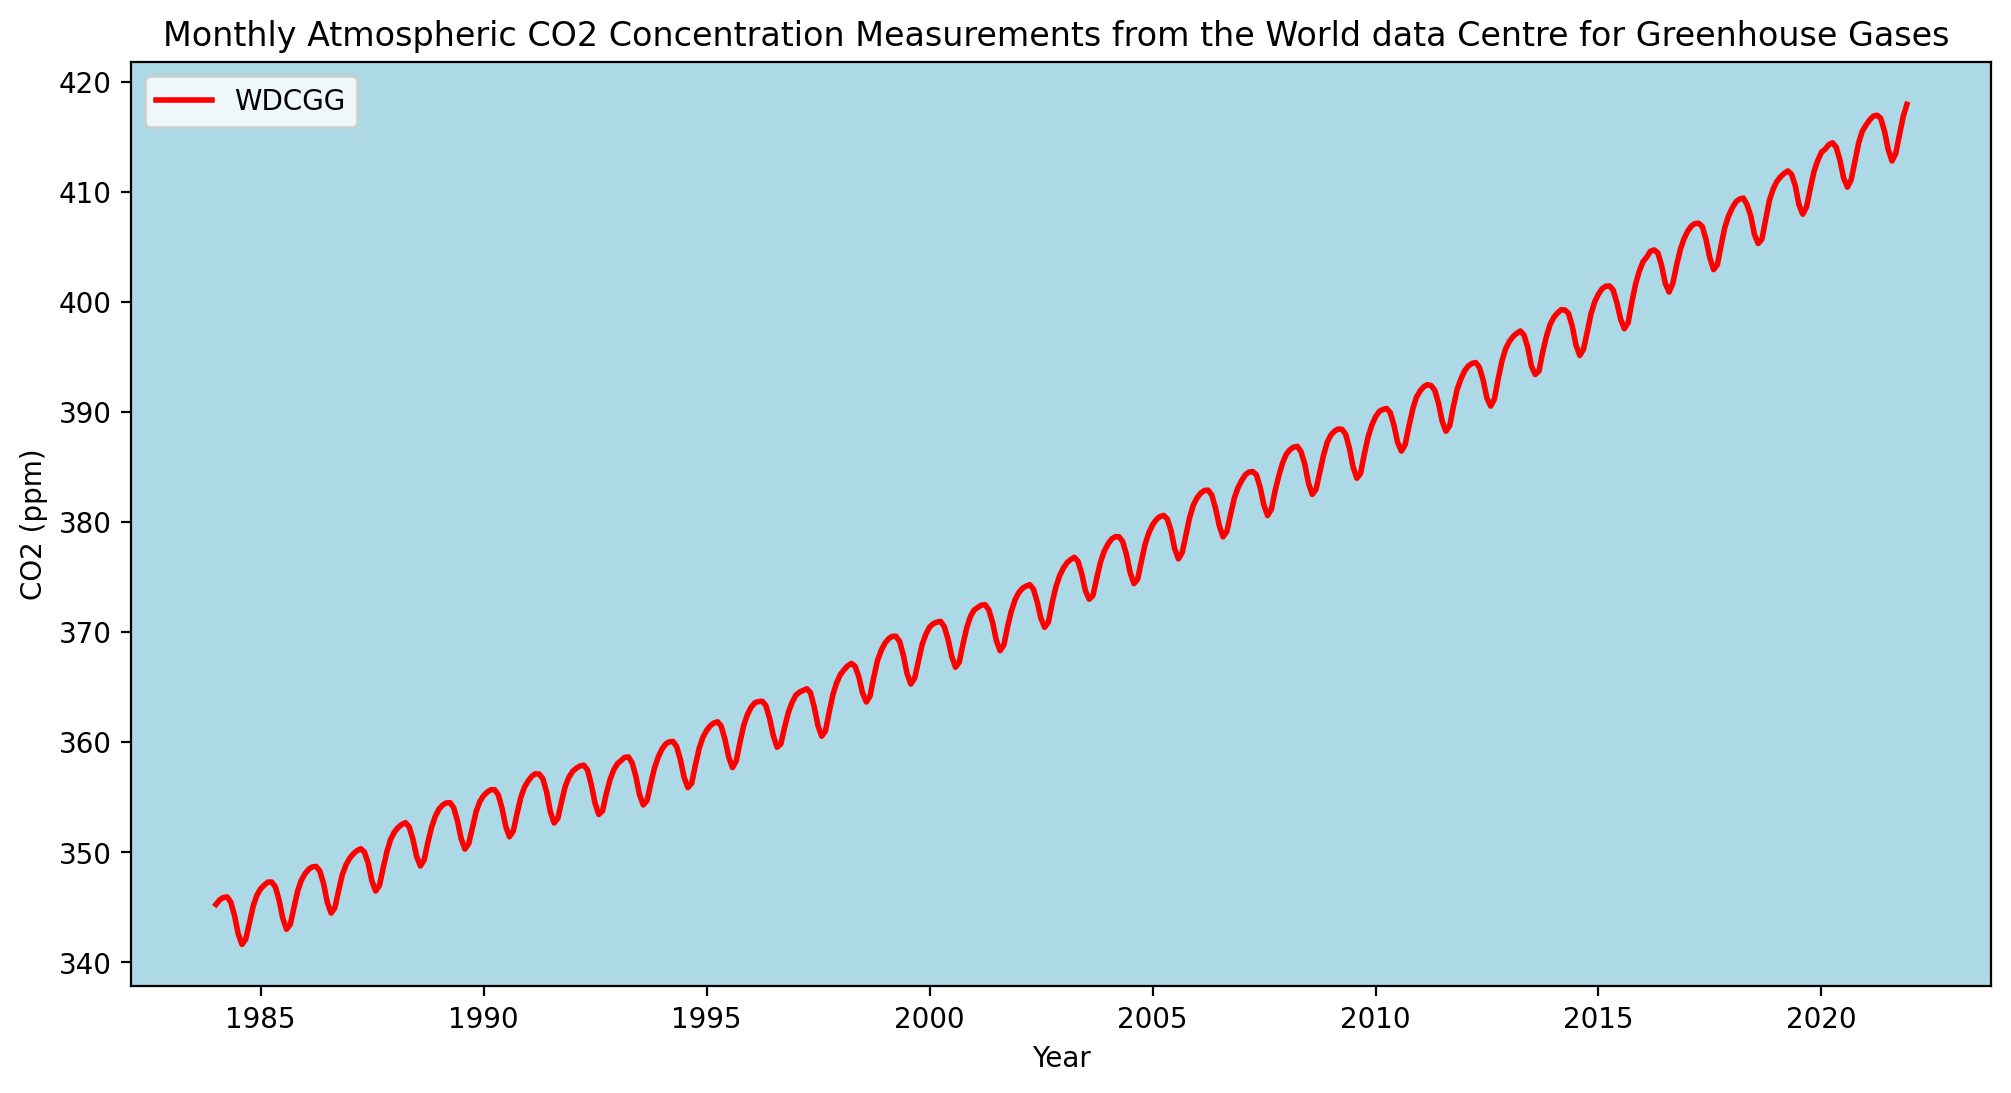

In [9]:
fig, ax = plt.subplots(figsize=(12,6))  #plot
ax.plot(CO2_WDCGG['Date'],
        CO2_WDCGG['WDCGG CO2 (ppm)'],
        linewidth = 2, label = 'WDCGG',
        color = 'red')
#legend
ax.legend() 

# title
ax.set_title('Monthly Atmospheric CO2 Concentration Measurements from the World data Centre for Greenhouse Gases ')

# axes labels
ax.set_ylabel('CO2 (ppm)')
ax.set_xlabel('Year')

#background color
ax.set_facecolor("lightblue")

**Figure 5**: Monthly atmospheric concentrations of CO2, measured by the World Data Centre for Greenhouse Gases (WDCGG) operated by the Japan 
Meteorological Agency (JMA) under the Global Atmosphere Watch programm 
(GAW) of the World Meteorological Organization (WMO). Carbon dioxide expressed in parts per million (ppm), which is its mole fraction in dry air. This data was collected over a period from January 1984 – December 2021. The trend of this data reveals a steady increase in carbon dioxide concentration, with some seasonal variation. <br>
Source: https://library.wmo.int/records/item/58743-no-18-26-october-2022on

### <span style="color:blue"> The three carbon dioxide graphs in the cells above clearly follow a similar upward trend, but they can also be plotted together to reveal any discrepancies or variations between data from the different sources.

#  <span style="color:red"> #11
### <span style="color:blue"> An important note on the data collection methods of Mauna Loa, NOAA, and WDCGG: Mauna Loa is a single observatory and its measurments are all collected there. It is considered to be a site that is provides a good representation of CO2 concentration in the northern hemisphere. NOAA and WDCGG both use measurements from multiple sites for their concentration data. 

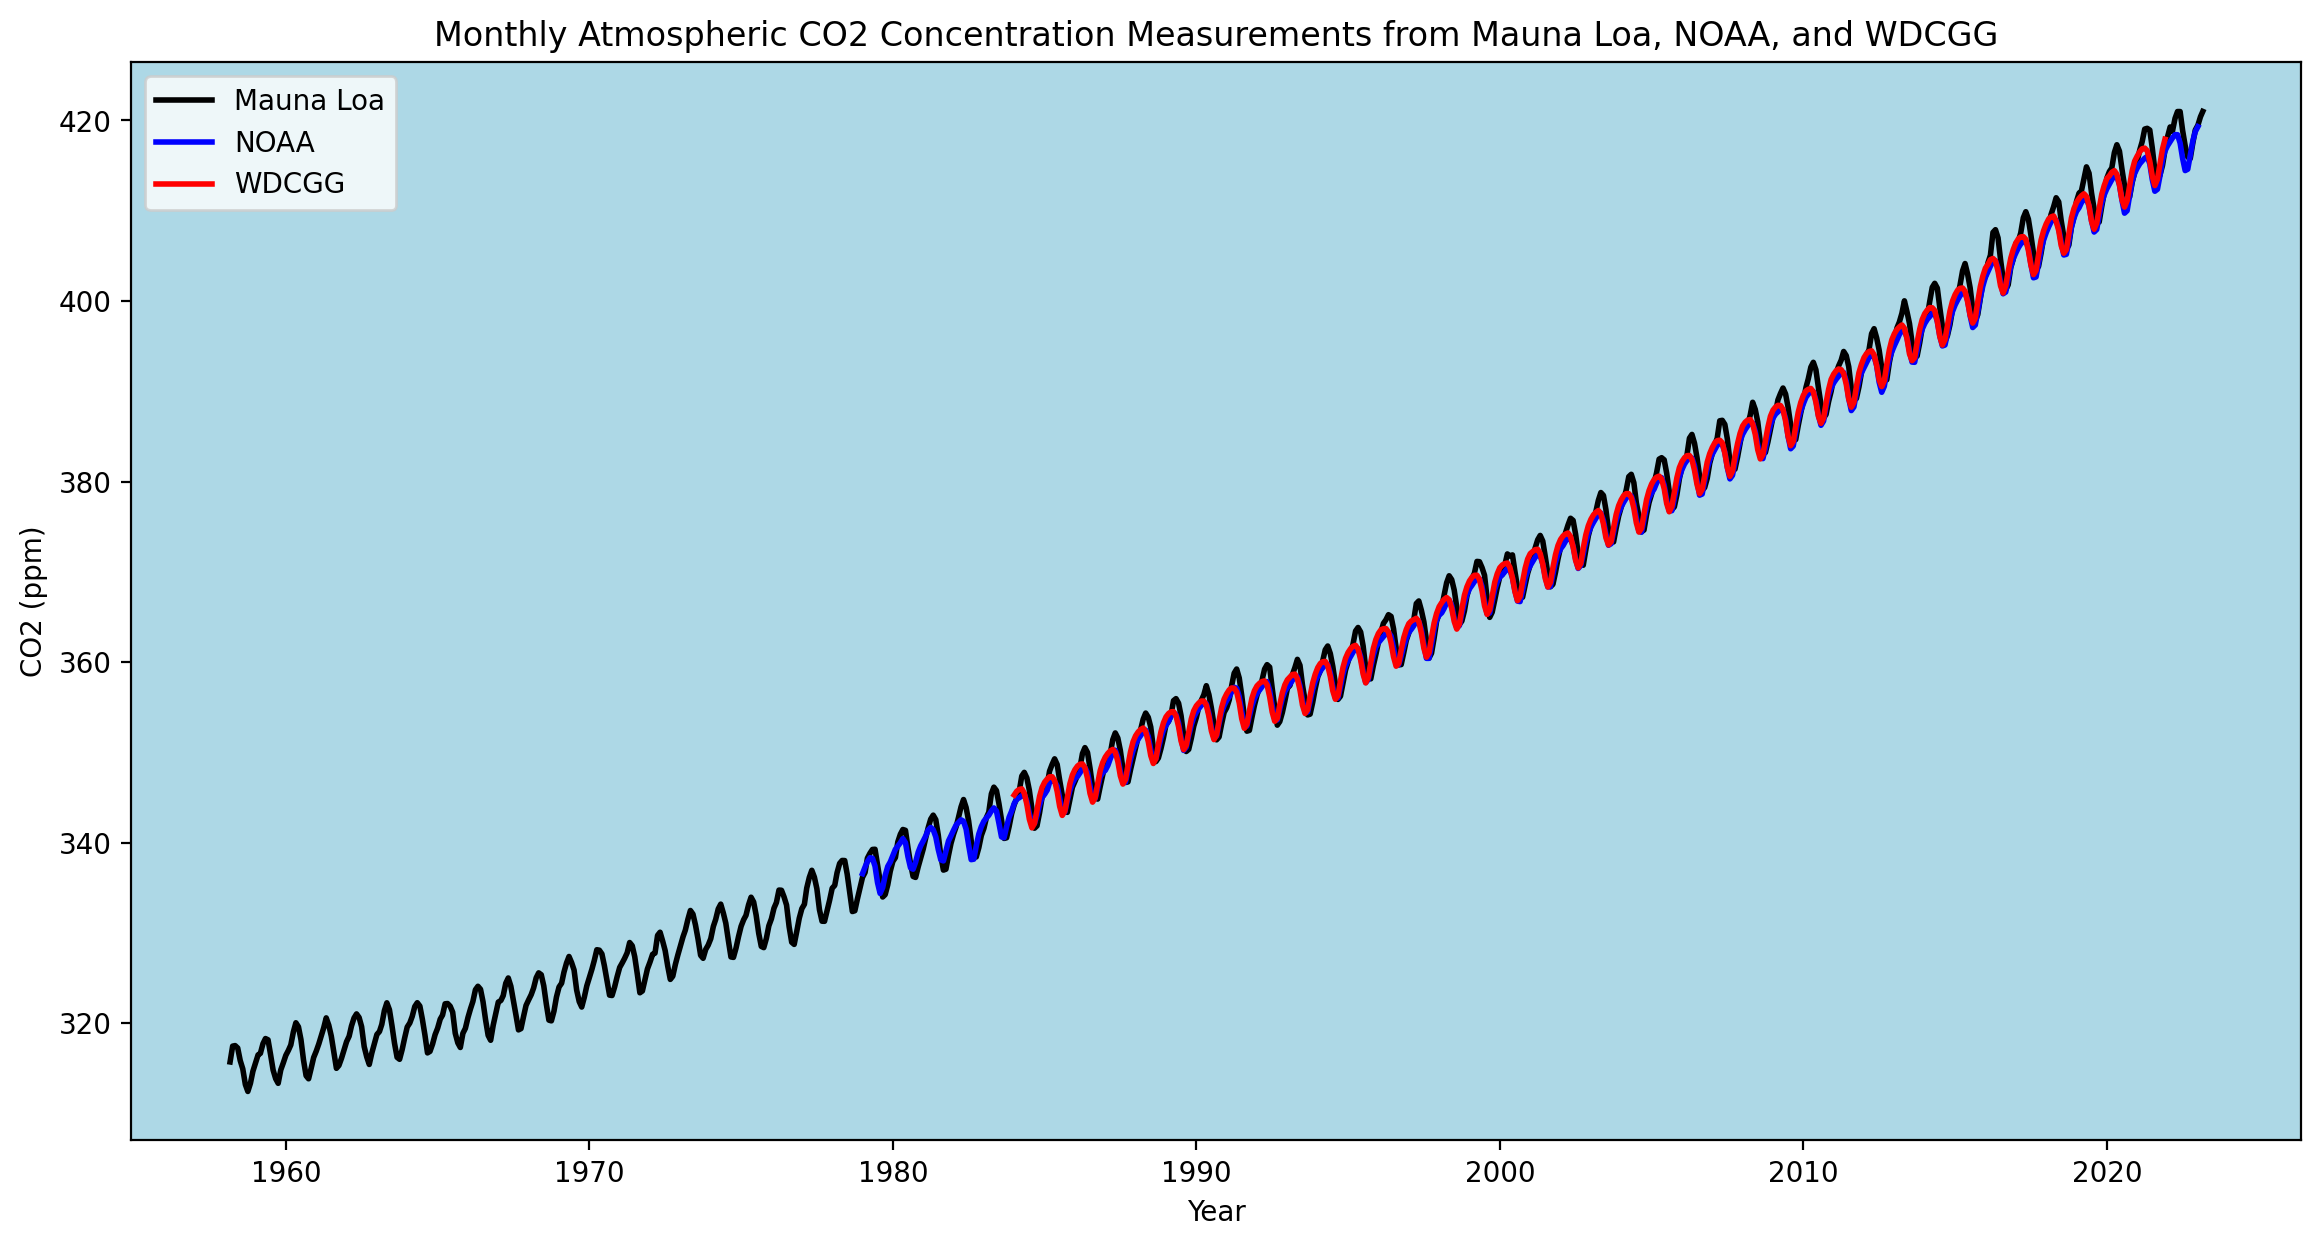

In [10]:
fig, ax = plt.subplots(figsize=(14,7))  #plot

ax.plot(CO2_MaunaLoa['Date'], #each ax.plot will plot on the graph defined above. fig and ax and ax.plot are important here. Data from Mauna Loa, NOAA, and WDCGG
        CO2_MaunaLoa['Mauna Loa CO2 (ppm)'],
        linewidth = 2, label = 'Mauna Loa',
        color = 'black')

ax.plot(CO2_NOAA['Date'],
        CO2_NOAA['NOAA CO2 (ppm)'],
        linewidth = 2, label = 'NOAA',
        color = 'blue')

ax.plot(CO2_WDCGG['Date'],
        CO2_WDCGG['WDCGG CO2 (ppm)'],
        linewidth = 2, label = 'WDCGG',
        color = 'red')

#setting legend, title, and axes for the combination graph
ax.legend()

ax.set_title('Monthly Atmospheric CO2 Concentration Measurements from Mauna Loa, NOAA, and WDCGG')

ax.set_ylabel('CO2 (ppm)')
ax.set_xlabel('Year') 

#background color
ax.set_facecolor("lightblue")

**Figure 6**: Monthly atmospheric concentrations of CO2, combining the graphs from the Mauna Loa, NOAA, and WDCGG datasets Carbon dioxide expressed in parts per million (ppm), which is its mole fraction in dry air. Data ranges from 1958-2023, although not all datasets span the entire timeframe. This graph shows that carbon dioxide concentration data from different sources all show the same trend, that concentrations are increasing in the atmosphere over time.

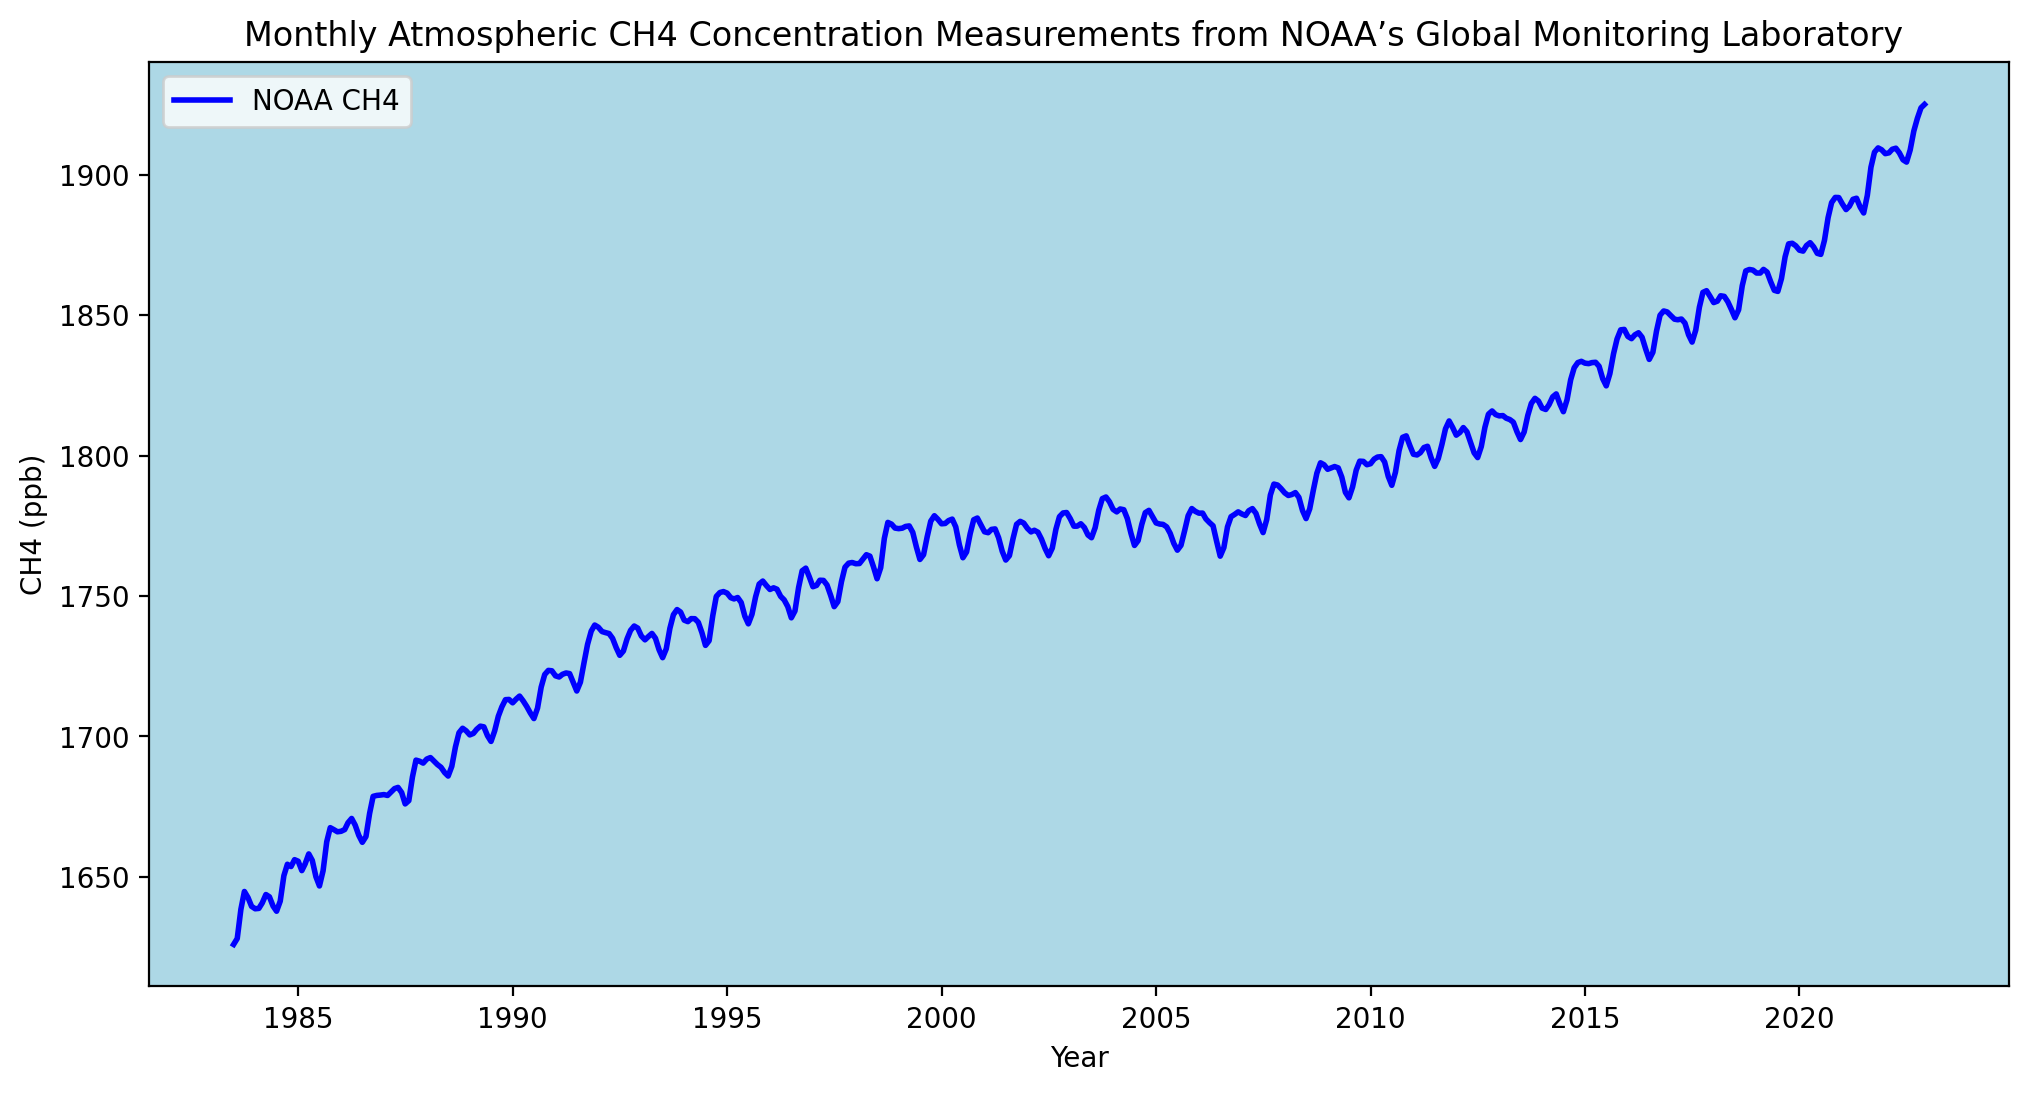

In [11]:
fig, ax = plt.subplots(figsize=(12,6))  #plot
ax.plot(NOAA_CH4['Date'],
        NOAA_CH4['NOAA CH4 (ppb)'],
        linewidth = 2, label = 'NOAA CH4',
        color = 'blue') #For indiidual graphs, blue will correspond to CH4
#legend
ax.legend() 

# title
ax.set_title('Monthly Atmospheric CH4 Concentration Measurements from NOAA’s Global Monitoring Laboratory ')

# axes labels
ax.set_ylabel('CH4 (ppb)')
ax.set_xlabel('Year')

#background color
ax.set_facecolor("lightblue")

**Figure 7** : Globally Averaged Monthly Atmospheric CH4 Concentration Measurements over 
Marine Surface Sites from NOAA’s Global Monitoring Laborator. Methane is presented here in parts per billion (ppb). This data was collected from July 1983 – December 2022. The overall trend reflected here is the increase in atmospheric methane over time. Notably, there is a period of time in the early 2000's where methane levels leveled out, alhtough they have since been rising. <br>
Source: Lan, X., K.W. Thoning, and E.J. Dlugokencky: Trends in globally-averaged 
CH4, N2O, and SF6 determined from NOAA Global Monitoring Laborator 
measurements. Version 2023-0 , https://doi.org/10.15138/P8XG-AA10y

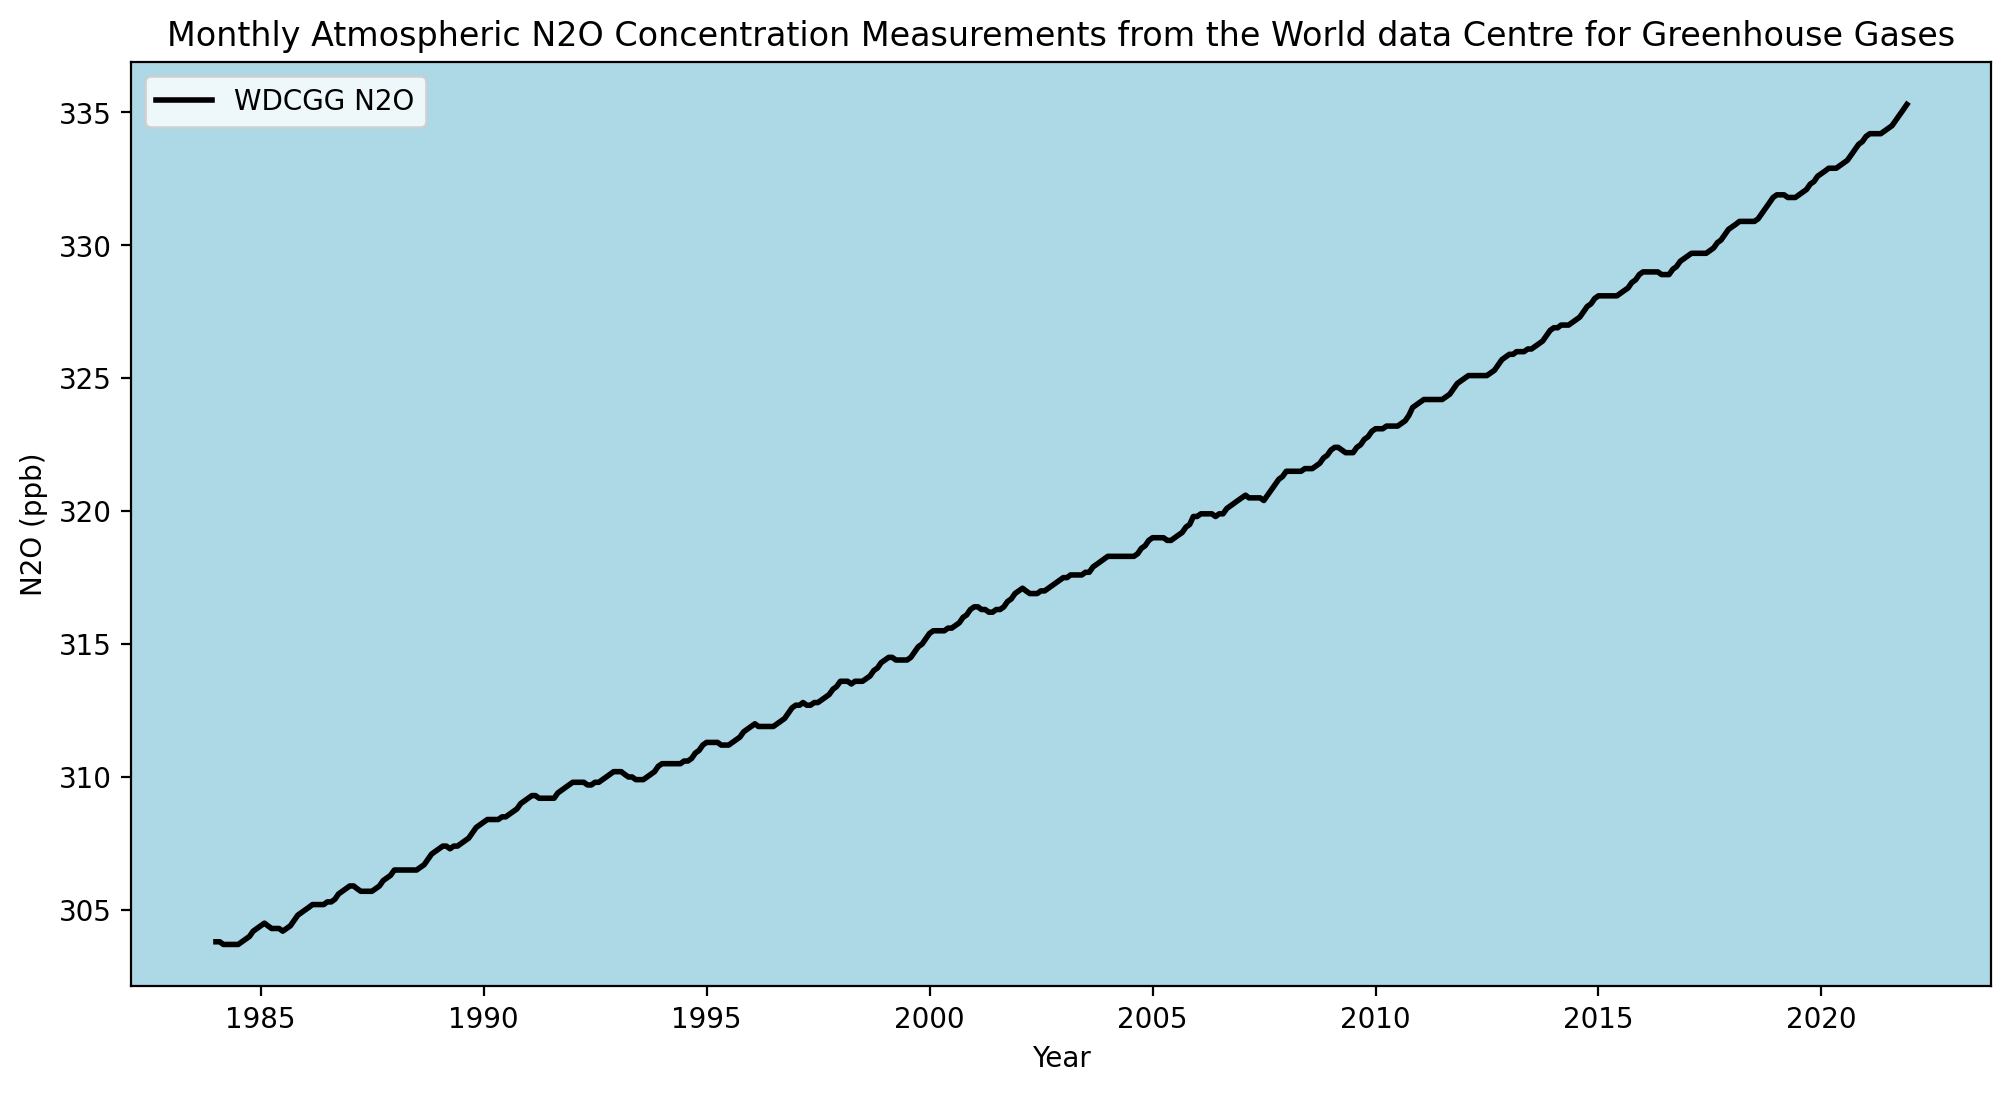

In [25]:
fig, ax7 = plt.subplots(figsize=(12,6))  #plot
ax7.plot(WDCGG_N2O['Date'],
        WDCGG_N2O['WDCGG N2O (ppb)'],
        linewidth = 2, label = 'WDCGG N2O',
        color = 'black') #For individual graphs black will correspond to N2O
#legend
ax7.legend() 

# title
ax7.set_title('Monthly Atmospheric N2O Concentration Measurements from the World data Centre for Greenhouse Gases')

# axes labels
ax7.set_ylabel('N2O (ppb)')
ax7.set_xlabel('Year')

#background color
ax7.set_facecolor("lightblue")

**Figure 8**: Globally Averaged Monthly Atmospheric N2O Concentration Measurements from 
the World data Centre for Greenhouse Gases (WDCGG) operated by the Japa 
Meteorological Agency (JMA) under the Global Atmosphere Watch program 
(GAW) of the World Meteorological Organization (WM Nitrous oxide concentration are presented in parts per billion (ppb). Data was collected from January 1984 – December 2021. A fairly linear trend is depicted, with a relatively constant increase. Annulal fluctuations are not very drastic when present. <br>
Source: https://library.wmo.int/records/item/58743-no-18-26-october-2022O)

### <span style="color:blue"> As we can see from various data sources and measurement parameters, greenhouse gas concentration in Earth's atmosphere are increasing across the board. This leads to a major question....
## <span style="color:red"> Where are all these gases coming from!?

### <span style="color:blue"> To answer this question, we must consider concentrations from the pre-industrial era. Concentrations for each of the three greenhouse gases depicted above are:
#### CO2: ~280 ppm; CH4 : ~700 ppb; N2O: ~280 ppb
#### We can use this data to compare the pre-industrial measurements to modern data by finding the percent increase. For the following calculations, the percent change will be calculate using these values and the annual data for the last full year of modern measurements. Mauna Loa is chosen as the representative CO2 data.

#  <span style="color:red"> #3

In [8]:
#annual average greenhouse gas concentrations for the last year(12 months) of the datasets
AvgCO2_modern = (sum(CO2_MaunaLoa.tail(12)['Mauna Loa CO2 (ppm)']))/12 #calling on the last 12 months of data with "tail"
print(AvgCO2_modern, "ppm CO2" ) #checking value. now repeat for the other gases
AvgCH4_modern =(sum(NOAA_CH4.tail(12)['NOAA CH4 (ppb)']))/12
print(AvgCH4_modern, "ppb CH4")
AvgN2O_modern =(sum(WDCGG_N2O.tail(12)['WDCGG N2O (ppb)']))/12
print(AvgN2O_modern, "ppb N2O")

418.9475 ppm CO2
1912.0216666666665 ppb CH4
334.5083333333333 ppb N2O


In [9]:
# to get the percent change, this equation will be used: %change = ((present value – preindustrial value) / (preindustrial value))*100
CO2_PerChange = ((AvgCO2_modern - 280)/(280))*100
CH4_PerChange = ((AvgCH4_modern - 700)/(700))*100
N2O_PerChange = ((AvgN2O_modern - 280)/(280))*100

In [10]:
print("The percent changes from pre-industrial to modern times in these three common greenhouse gases are", CO2_PerChange, "% CO2,", CH4_PerChange, "% CH4, and", N2O_PerChange, "% N2O.") #lets see those outputs

The percent changes from pre-industrial to modern times in these three common greenhouse gases are 49.624107142857135 % CO2, 173.14595238095237 % CH4, and 19.4672619047619 % N2O.


#  <span style="color:red"> #4

### All of the greenhouse gases have increased in atmospheric concentration since the pre-industrial era, as shown by the percent increase calculations. The one that has increased the most is methane (CH4), which has risen by 173% since the pre-industrial times. Methane is followed by carbon dioxide(CO2) with a 50% increase, and nitrous oxide (N2O) at 20% increase.

#  <span style="color:red"> #5
## <span style="color:blue"> Just how peculiar are these changes?
### To understand how drastic these recent increases in greenhouse gases are, it is pertinent to consider how these gases have fluctuated in the Earth's atmosphere on a larger timescale. Ice core data is especially useful in this regard, because ice cores can yield atmospheric data for hundreds of thousands of years. Considering CO2 over the last 800,000 years, atmospheric concentrations typically range from around 175-300 ppm. With current levels soaring above 400 ppm, there is undoubtedly an unprecedented increase in CO2. The graphic below may help to visualize this change.

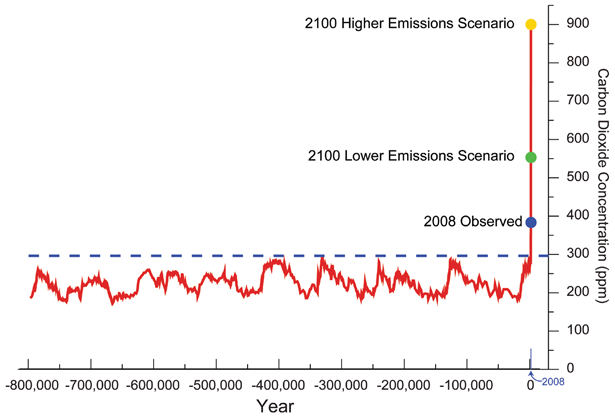

**Figure 9**: Image shows a graph of carbon dioxide concentrations over the last 800,000 years. The dashed blue line represents zero temperature anomoly compared to relatively recent pre-industrial levels. This graph shows the relatively consistent cycle of CO2 over the last 800,000 years, and the alarmingly sharp increase of modern levels. Also in the graph are estimates for 2100 based on higher and lower emission scenarios. <br>
Source: https://nca2009.globalchange.gov/800000-year-record-co2-concentration/index.html

#  <span style="color:red"> #6

### There is a trend in CO2 emmisions that is apparent in all three datasets; the concentrations show an oscillating pattern, where they rise and fall on a regular cycle. Although the general trend is still a net incline in CO2 concentration, the oscillation is worth noting. Referring to figure three, which shows a subset of the Moana Loa CO2 data, it is possible to see the cyclical nature of this trend much easier. This temporal pattern is apparently seasonal; carbon dioxide increases in the winter season, and then drops in the spring and summer. The net increase is still positive, which indicates that more CO2 rises more in the winter than it falls in the warmer months. The best explanation for this pattern is uptake of CO2 by plants. During the winter plants will not intake much carbon dioxide, while during the spring and summer they will grow with higher activity, and so will remove CO2 from the atmosphere. That being said, even with their annual growth season, plants are not able to balance the rising carbon dioxide levels in the planets atmosphere. 

# <span style="color:blue"> Carbon Emissions
### <span style="color:blue"> Where is all the CO2 coming from?
#### Plotted below are datasets that describe emission trends for carbon dioxide throughout the years. These datasets detail the various ways that anthropogenic sources have contributed to a dire imbalance of greenhouse gases in the Earth's atmosphere. 

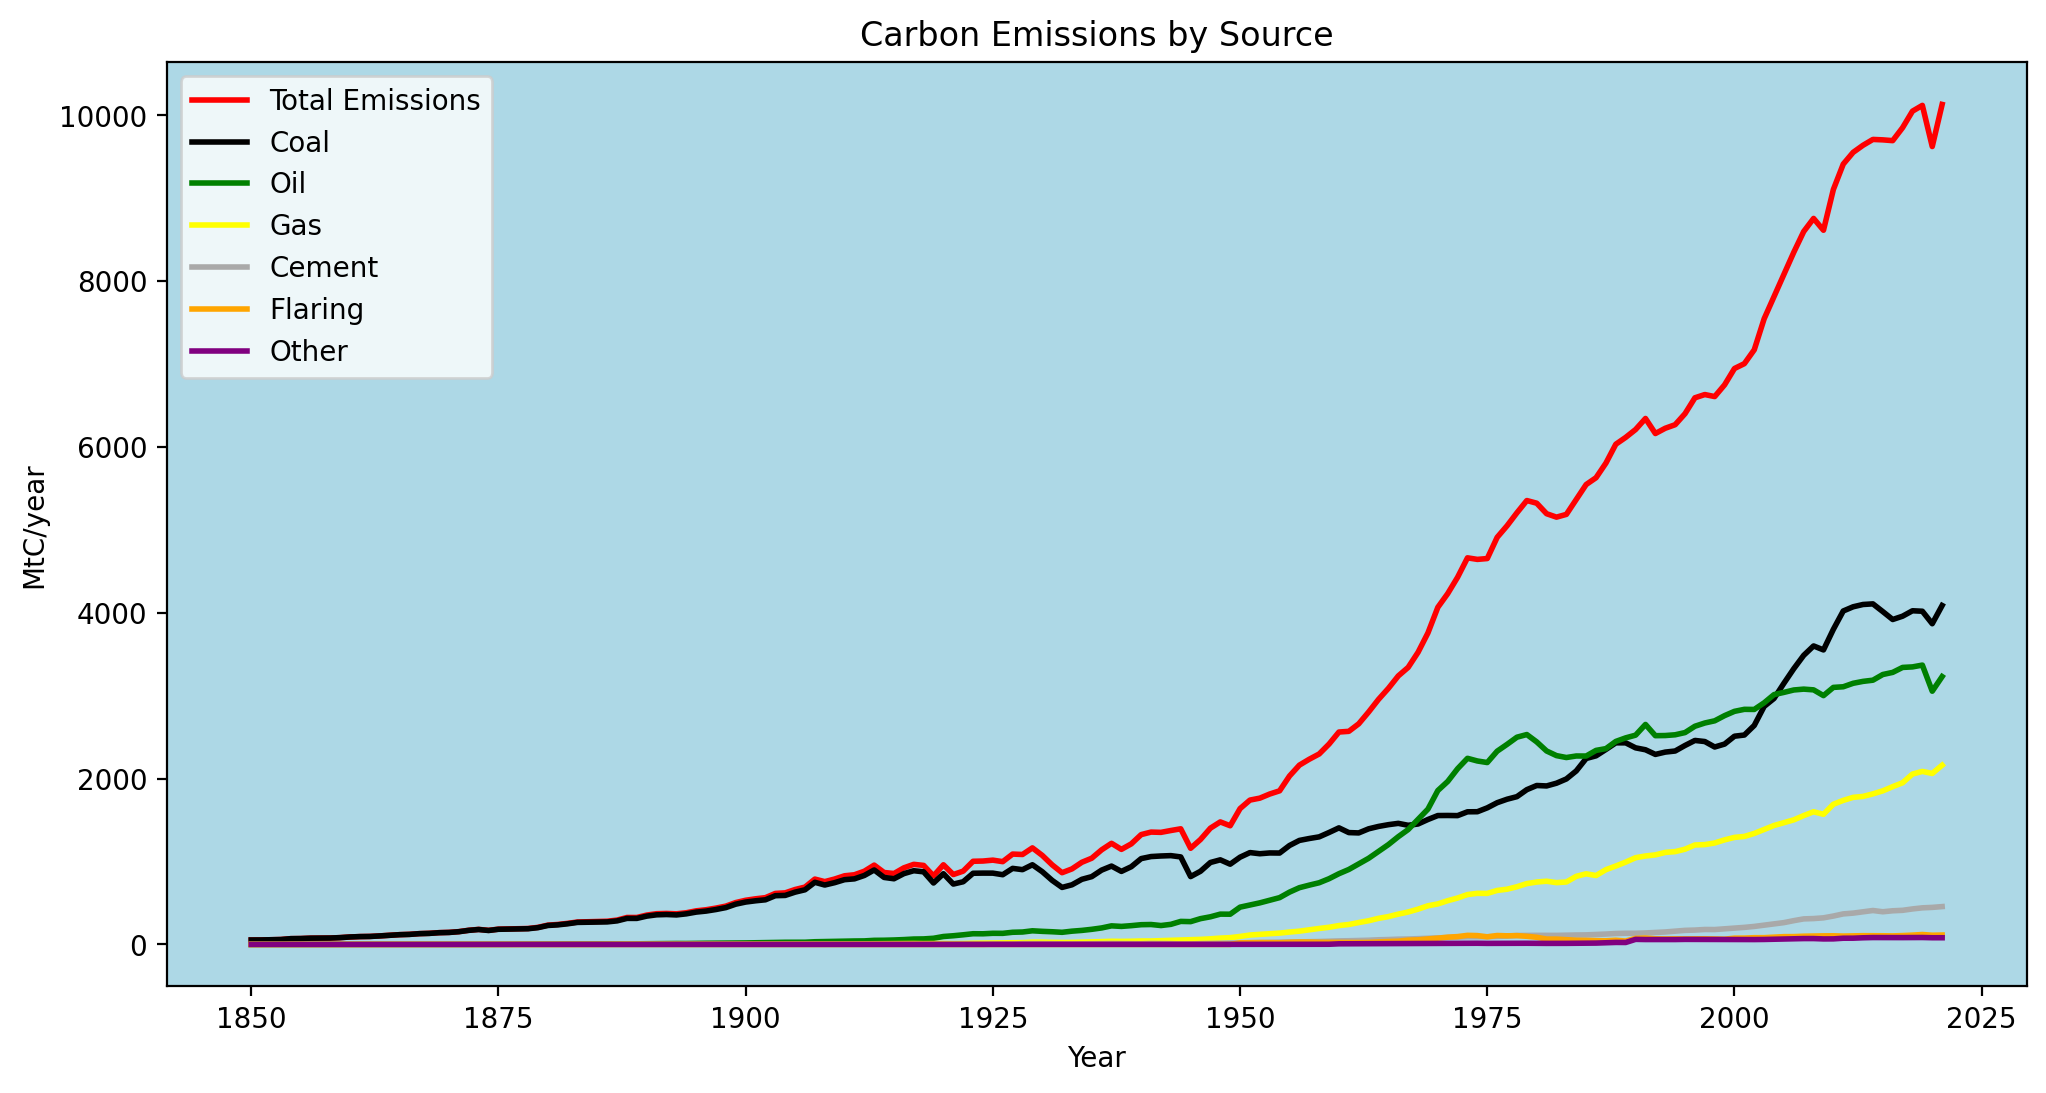

In [59]:
fig, ax = plt.subplots(figsize=(12,6))  #plot

#subplots for each type


ax.plot(FF_em_by_type['Year'],
        FF_em_by_type['fossil.emissions.excluding.carbonation (MtC/yr)'],
        linewidth = 2, label = 'Total Emissions',
        color = 'red') 

ax.plot(FF_em_by_type['Year'],
        FF_em_by_type['Coal (MtC/yr)'],
        linewidth = 2, label = 'Coal',
        color = 'black')

ax.plot(FF_em_by_type['Year'],
        FF_em_by_type['Oil (MtC/yr)'],
        linewidth = 2, label = 'Oil',
        color = 'green')

ax.plot(FF_em_by_type['Year'],
        FF_em_by_type['Gas (MtC/yr)'],
        linewidth = 2, label = 'Gas',
        color = 'yellow')

ax.plot(FF_em_by_type['Year'],
        FF_em_by_type['Cement.emission (MtC/yr)'],
        linewidth = 2, label = 'Cement',
        color = 'Darkgray')

ax.plot(FF_em_by_type['Year'],
        FF_em_by_type['Flaring (MtC/yr)'],
        linewidth = 2, label = 'Flaring',
        color = 'orange')

ax.plot(FF_em_by_type['Year'],
        FF_em_by_type['Other (MtC/yr)'],
        linewidth = 2, label = 'Other',
        color = 'purple')


#legend
ax.legend() 

# title
ax.set_title('Carbon Emissions by Source')

# axes labels
ax.set_ylabel('MtC/year')
ax.set_xlabel('Year')

#background color
ax.set_facecolor("lightblue")


**Figure 10**: Annual carbon emissions by emission type. This graph presents the carbon dioxide emitted in megatons of carbon per year (MtC/year) for a number of common carbon emission sources. The sum of the different sources equate to the red, total emissions line on the graph. Notably, the top three sources of carbon emission (coal, oil, and gas) are all related to fossil fuels. Data was measured from 1850-2021. <br>
Source: Global Carbon Project. (2022). Supplemental data of Global Carbon 
Budget 2022 (Version 1.0) [Data set]. Global Carbon Project 
https://doi.org/10.18160/gcp-2022

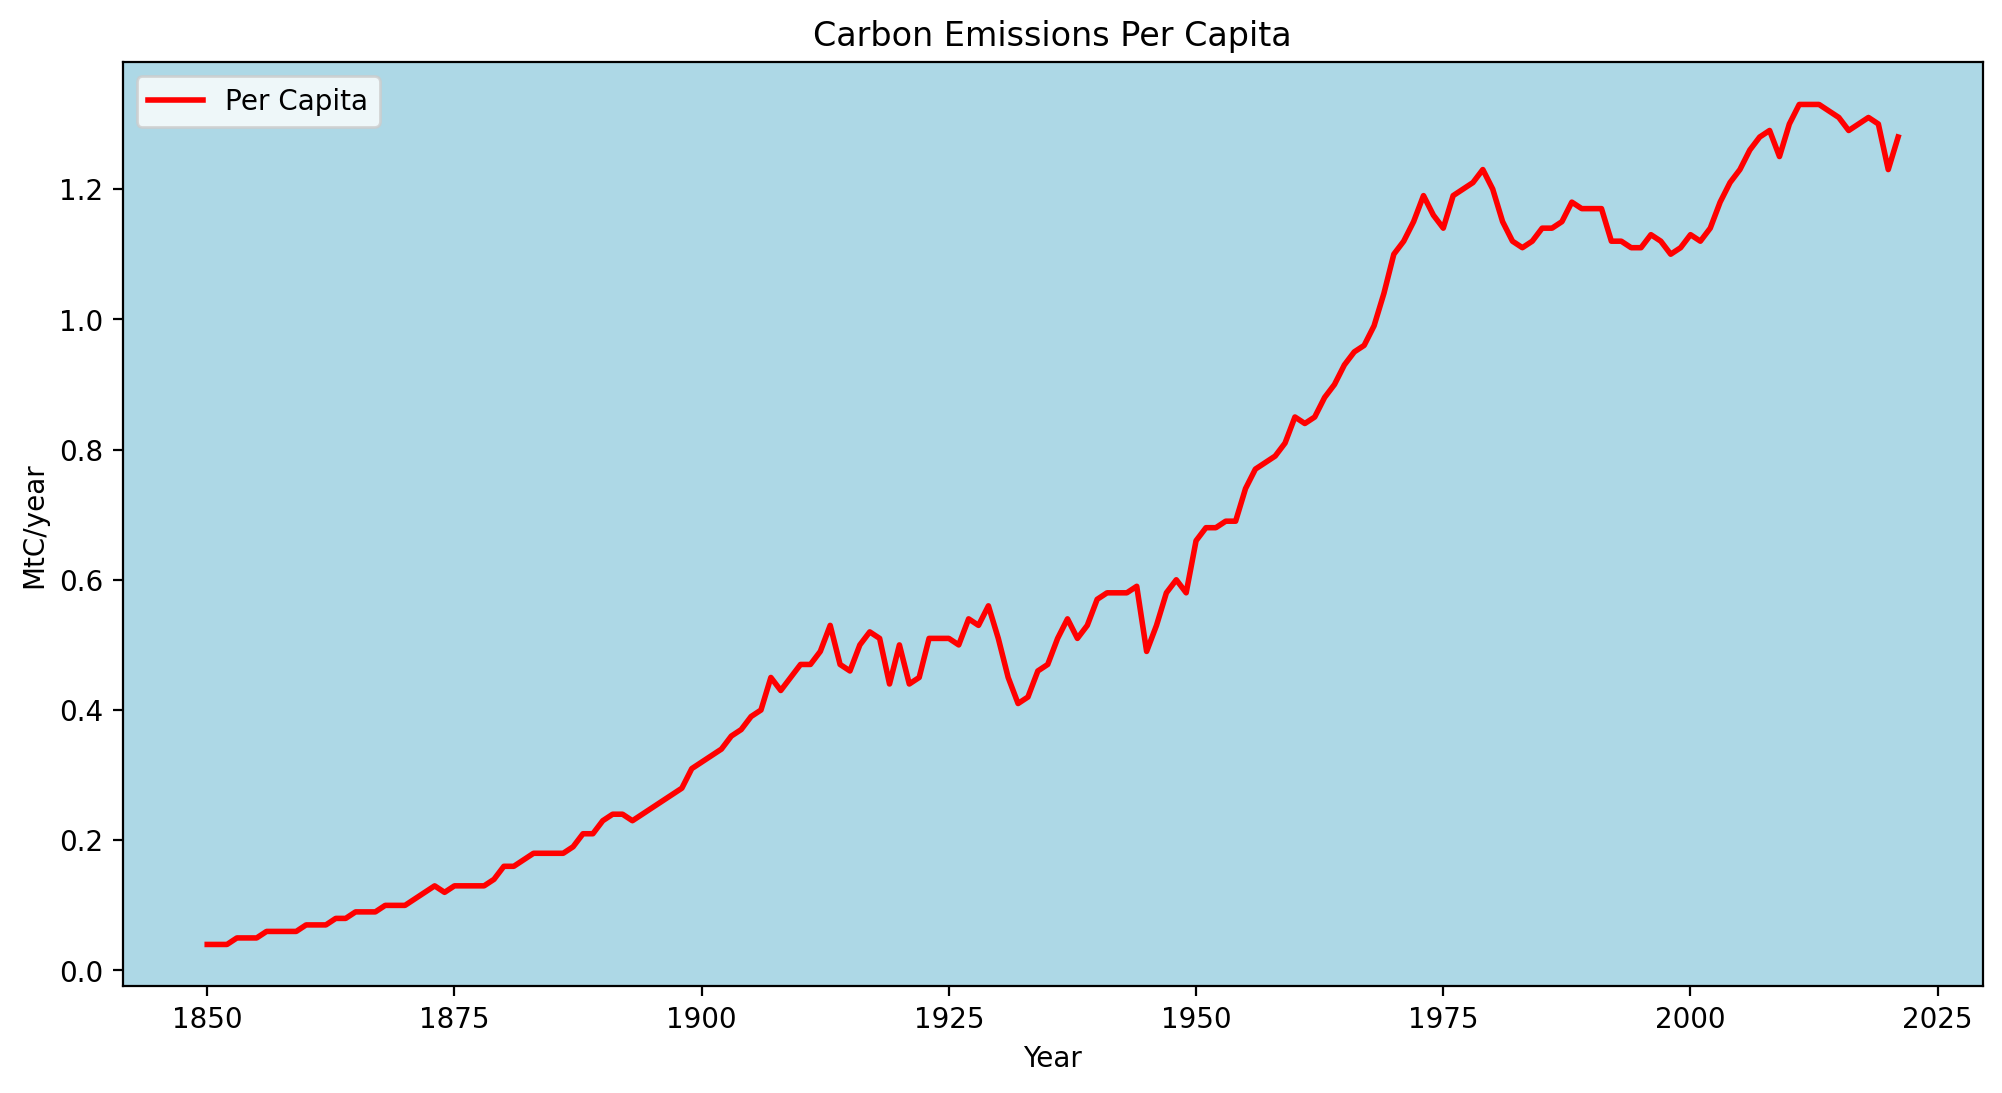

In [60]:
#a seperate graph showing per capita emissions
fig, ax = plt.subplots(figsize=(12,6))  #plot


ax.plot(FF_em_by_type['Year'],
        FF_em_by_type['Per.Capita (MtC/yr)'],
        linewidth = 2, label = 'Per Capita',
        color = 'red')
#legend
ax.legend() 

# title
ax.set_title('Carbon Emissions Per Capita')

# axes labels
ax.set_ylabel('MtC/year')
ax.set_xlabel('Year')

#background color
ax.set_facecolor("lightblue")



**Figure 11**: This figure, derived from the same dataset as figure 10, shows the carbon emissions per capita from 1850-2021. This data is presented in Mtc/year. The general trend for this graph is of increasing emissions per capita, although it has several periods of time where the emissions per capita appear to level out. <br>
Source: Global Carbon Project. (2022). Supplemental data of Global Carbon 
Budget 2022 (Version 1.0) [Data set]. Global Carbon Project 
https://doi.org/10.18160/gcp-2022

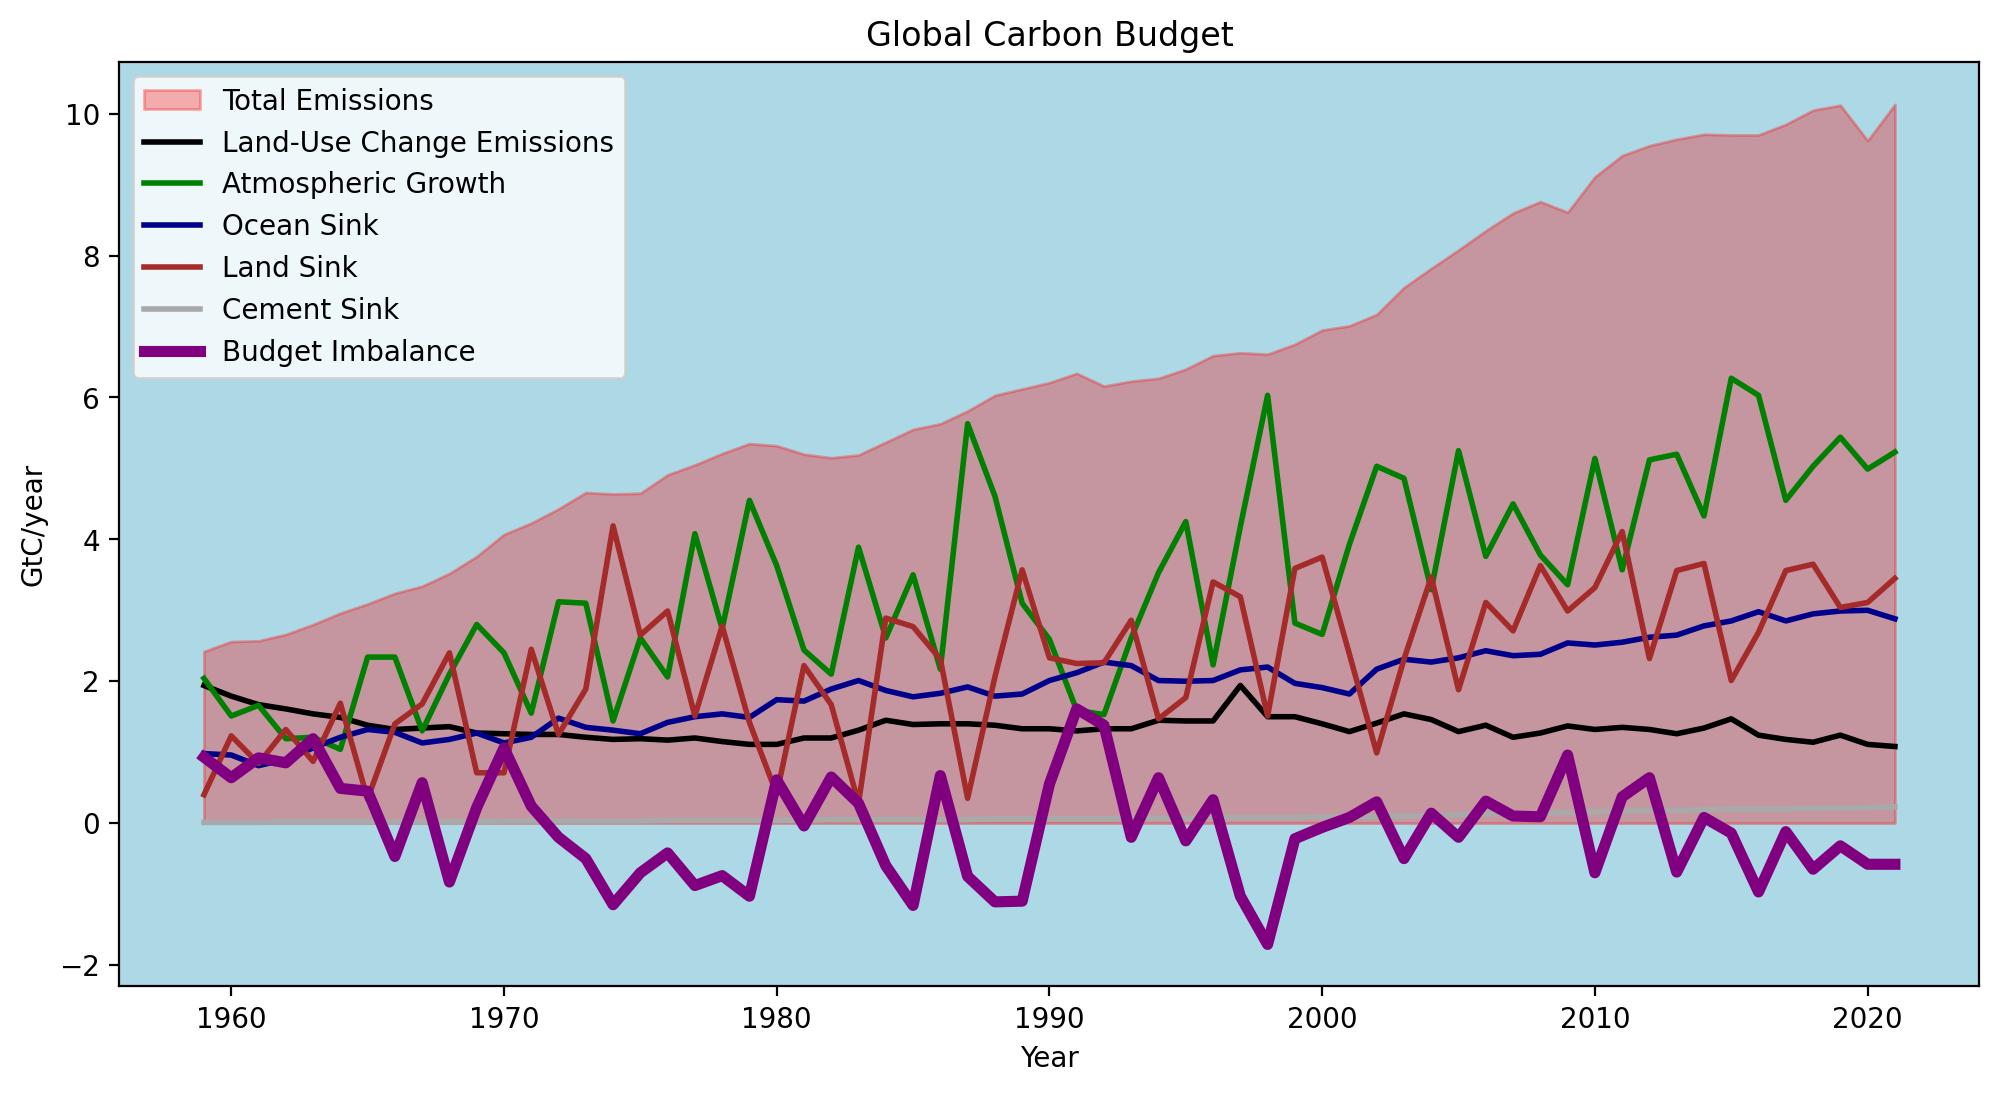

In [10]:
fig, ax = plt.subplots(figsize=(12,6))  #plot

#subplots for each type


ax.fill_between(Global_C_Budget['Year'], 0, 
        Global_C_Budget['fossil emissions excluding carbonation'],
        color = "red",
        alpha = 0.30, #transparency
        label = 'Total Emissions')
        

ax.plot(Global_C_Budget['Year'],
        Global_C_Budget['land-use change emissions'],
        linewidth = 2, label = 'Land-Use Change Emissions',
        color = 'black')

ax.plot(Global_C_Budget['Year'],
        Global_C_Budget['atmospheric growth'],
        linewidth = 2, label = 'Atmospheric Growth',
        color = 'green')*-1

ax.plot(Global_C_Budget['Year'],
        Global_C_Budget['ocean sink'],
        linewidth = 2, label = 'Ocean Sink',
        color = 'DarkBlue')*-1

ax.plot(Global_C_Budget['Year'],
        Global_C_Budget['land sink'],
        linewidth = 2, label = 'Land Sink',
        color = 'Brown')*-1

ax.plot(Global_C_Budget['Year'],
        Global_C_Budget['cement carbonation sink'],
        linewidth = 2, label = 'Cement Sink',
        color = 'darkgray')*-1

ax.plot(Global_C_Budget['Year'],
        Global_C_Budget['budget imbalance'],
        linewidth = 4, label = 'Budget Imbalance',
        color = 'purple')


#legend
ax.legend(loc = 'upper left') #moving label so it doesn't cover graph

# title
ax.set_title('Global Carbon Budget')

# axes labels
ax.set_ylabel('GtC/year')
ax.set_xlabel('Year')

#background color
ax.set_facecolor("lightblue")


**Figure 12**: Annual global carboin budget, considering emissions and sinks. Presented in gigatons of carbon per year (GtC/year) and spanning from 1959-2021. The total emissions reflects the sum of the various sources of carbon in the atmosphere, and is represented by the filled plot. In an ideal scenario, the influx of carbon would be offset by the sinks present, but in reality this is far out of balance and more CO2 is emitted than can be removed each year. <br>
Source:  Global Carbon Project. (2022). Supplemental data of Global Carbon 
Budget 2022 (Version 1.0) [Data set]. Global Carbon Project 
https://doi.org/10.18160/gcp-2022

#  <span style="color:red"> #7
These three greenhouse gases, CO2, CH4, and N2O are all rising in concentration within the atmosphere. The sources for each of these are ultimately human activity, but what aspect of human activity causes these emissions may vary. For CO2, the main sources are fossil fuels. Figure 10 describes this quite well, revealing that the main source of CO2 today is coal, followed by oil and gas. CH4 similarly is mostly emitted by the burning of fossil fuels, especially natural gas. Agriculture, particularly livestock farming, is another major source of methane. Finally, N2O is rising in concentration primarily as a result of agricultural practices. 
## <span style="color:red"> a: 
Of these three greenhouse gases, methane is the one that has the most potent impact. On the plus side, it does not have a very long lifespan in the atmosphere.
## <span style="color:red"> b:
Carbon dioxide is by far the longest lived greenhouse gases of the ones discussed here. It can take centuries for CO2 to be recycled from the atmosphere once it's there, which is why it is such a serious greenhouse gas.

#  <span style="color:red"> #8
With the decades of greenhouse gas data presented above, it is posible to get an idea of what some of the long term trends are. For CO2, CH4, and N2O, the predominant trend is a steady increase in atmospheric concentration. Each of the gases also shows some degree of seasonal fluctuation. This trend can be more closely observed for CO2, being the gas with the most obvious seasonal variability, in figure 3. CO2 concentration, while steadily rising, appear to be rising at a greater and greater rate as time passes; the slope of its concentration data grows steeper over time. N2O has what appears to be the most linear increase of the three gases, with only minor seasonal changes. CH4 presents the most interesting long term trend, as the concentration seems to level out temporarily from about 2000-2007. Since then, it has been on the rise again, and this leveling out is believed to reflect the fact that industrialized countries have been better at minimizing CH4 emissions during drilling and pumping of natural gas. <br>
Source: https://www.climate.gov/news-features/understanding-climate/after-2000-era-plateau-global-methane-levels-hitting-new-highs

### <span style="color:blue"> Another important consideration are what countries and regions are the top emitters

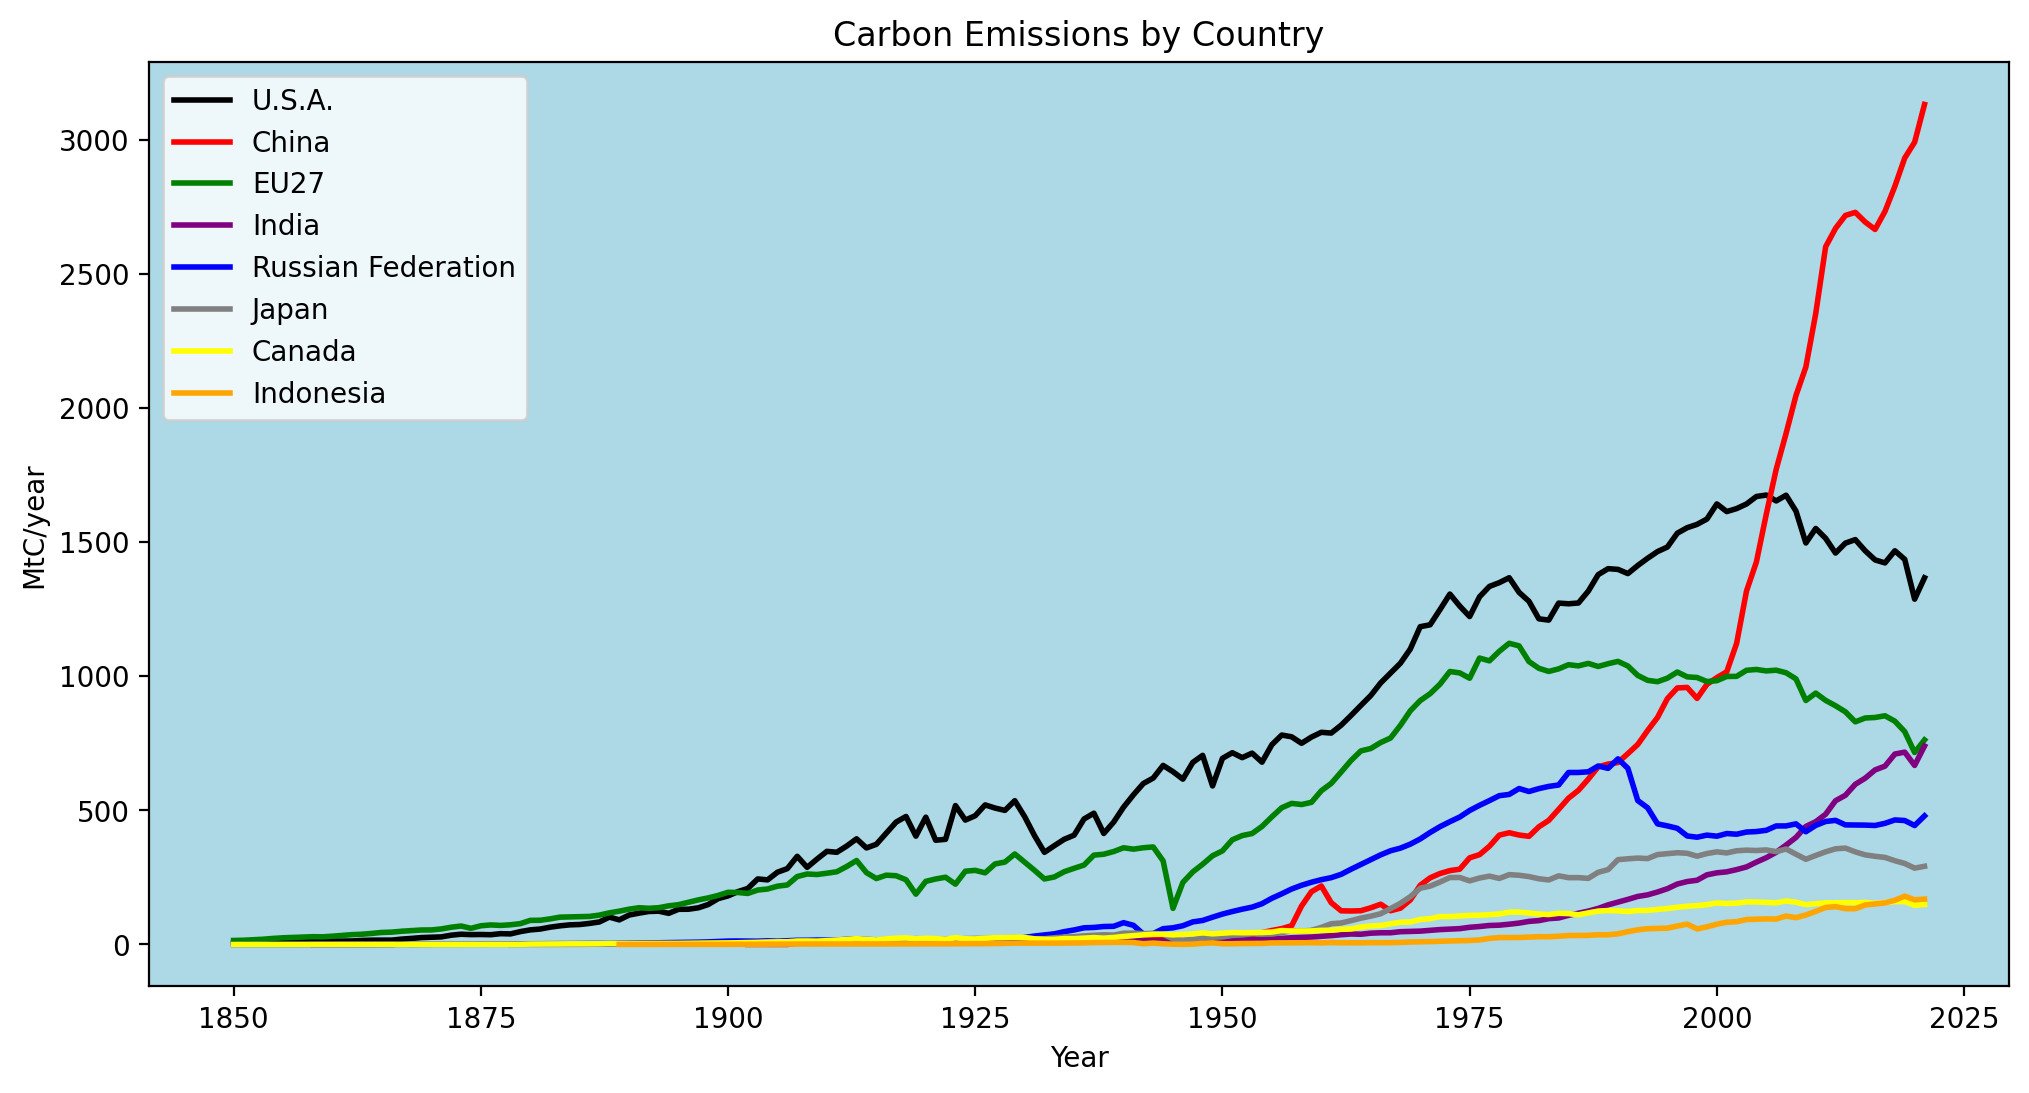

In [78]:
fig, ax = plt.subplots(figsize=(12,6))  #plot

#subplots for each type


ax.plot(Nation_FF_em['Year'],
        Nation_FF_em['UNITED STATES OF AMERICA'],
        linewidth = 2, label = 'U.S.A.',
        color = 'black') 

ax.plot(Nation_FF_em['Year'],
        Nation_FF_em['CHINA (MAINLAND)'],
        linewidth = 2, label = 'China',
        color = 'red') 

ax.plot(Nation_FF_em['Year'],
        Nation_FF_em['EU27'],
        linewidth = 2, label = 'EU27',
        color = 'GREEN') 

ax.plot(Nation_FF_em['Year'],
        Nation_FF_em['INDIA'],
        linewidth = 2, label = 'India',
        color = 'Purple') 

ax.plot(Nation_FF_em['Year'],
        Nation_FF_em['RUSSIAN FEDERATION'],
        linewidth = 2, label = 'Russian Federation',
        color = 'blue') 

ax.plot(Nation_FF_em['Year'],
        Nation_FF_em['JAPAN'],
        linewidth = 2, label = 'Japan',
        color = 'gray') 

ax.plot(Nation_FF_em['Year'],
        Nation_FF_em['CANADA'],
        linewidth = 2, label = 'Canada',
        color = 'yellow') 

ax.plot(Nation_FF_em['Year'],
        Nation_FF_em['INDONESIA'],
        linewidth = 2, label = 'Indonesia',
        color = 'orange') 




#legend
ax.legend() 

# title
ax.set_title('Carbon Emissions by Country')

# axes labels
ax.set_ylabel('MtC/year')
ax.set_xlabel('Year')

#background color
ax.set_facecolor("lightblue")


**Figure 13**: Annual Territorial Fossil Fuel Emissions by Country / Region. This graph presents the amount of carbon emissions in MtC/year that eight of the top emitting countries/regions are responsible for. China's emissions are especially high, which is in part due to the countries high population. Many of the countries depicted here have managed to level out or even reduce their emissions since 2000, but other continue to emit CO2 at higher rates. This small subset of countries still accounts for a major amount of the total carbon emitted into the atmosphere annually. 

#  <span style="color:red"> #9
Many of the top global greenhouse gas emittors by country are depicted above, but the top ten (2020) in order of most emissions are as follows: China, United States, India, Russia, Japan, Iran, Germany, South Korea, Saudi Arabia, and Indonesia. <br>
Source: https://worldpopulationreview.com/country-rankings/carbon-footprint-by-country

#  <span style="color:red"> #10 
To rank the fossil fuel emission in order from most to least prevelent, the order is: Coal, Oil, Gas, Cement, Flaring, and Other. This can be visualized in figure 10.

#  <span style="color:red"> #12
###   <span style="color:blue"> How much of the emitted carbon stays in the atmosphere, is taken up by the land, and is taken up by the oceans?

In [10]:
Global_C_Budget

Year  fossil emissions excluding carbonation  land-use change emissions  \
0   1959                                    2.42                       1.94   
1   1960                                    2.56                       1.79   
2   1961                                    2.57                       1.67   
3   1962                                    2.66                       1.61   
4   1963                                    2.80                       1.54   
..   ...                                     ...                        ...   
58  2017                                    9.85                       1.18   
59  2018                                   10.05                       1.14   
60  2019                                   10.12                       1.24   
61  2020                                    9.62                       1.11   
62  2021                                   10.13                       1.08   

    atmospheric growth  ocean sink  land sink  cement carbonation sink  \
0                 2.04        0.98       0.40                     0.01   
1                 1.51        0.96       1.23                     0.01   
2                 1.66        0.81       0.84                     0.01   
3                 1.19        0.90       1.32                     0.02   
4                 1.21        1.06       0.87                     0.02   
..                 ...         ...        ...                      ...   
58                4.55        2.85       3.56                     0.20   
59                5.03        2.95       3.65                     0.21   
60                5.44        2.99       3.04                     0.21   
61                4.99        3.00       3.11                     0.22   
62                5.23        2.88       3.45                     0.23   

    budget imbalance  
0               0.93  
1               0.64  
2               0.92  
3               0.85  
4               1.19  
..               ...  
58             -0.12  
59             -0.65  
60             -0.32  
61             -0.58  
62             -0.58  

[63 rows x 8 columns]

**Figure 14**:  Annual global carbon budget, considering emissions and sinks. Presented in gigatons of carbon per year (GtC/year) and spanning from 1959-2021. This table depicts the same data presented by graph in figure 12. It is presented in table form here to help guide the following calculations regarding carbon budget, and what percentages of carbon are capable of being recycled each year.
Source: Global Carbon Project. (2022). Supplemental data of Global Carbon Budget 2022 (Version 1.0) [Data set]. Global Carbon Project https://doi.org/10.18160/gcp-2022

In [13]:
#variables for following analysis, based on 2021 data. units in GtC/year
Total_em = 2.42+1.94 #total co2 emissions, sum of fossil fields and land use
Atm_grow = 2.04 #how much stays in atmosphere, measured 
O_sink = 0.98 #ocean uptake
L_sink = 0.40 #land uptake

In [19]:
#percentages from fracion of total emissions and mult by 100
per_atm = (Atm_grow/Total_em)*100
per_ocean =(O_sink/Total_em)*100
per_land = (L_sink/Total_em)*100

In [21]:
#values which will be organized in a markdown cell
print(per_atm, per_ocean, per_land)

46.78899082568808 22.477064220183486 9.174311926605506


Of the total amount of emitted carbon each year:
   * 46.8% remains in the atmosphere
   * 22.5% is taken up by the oceans
   * 9.2% is taken up by land

# <span style="color:blue"> Temperature Data

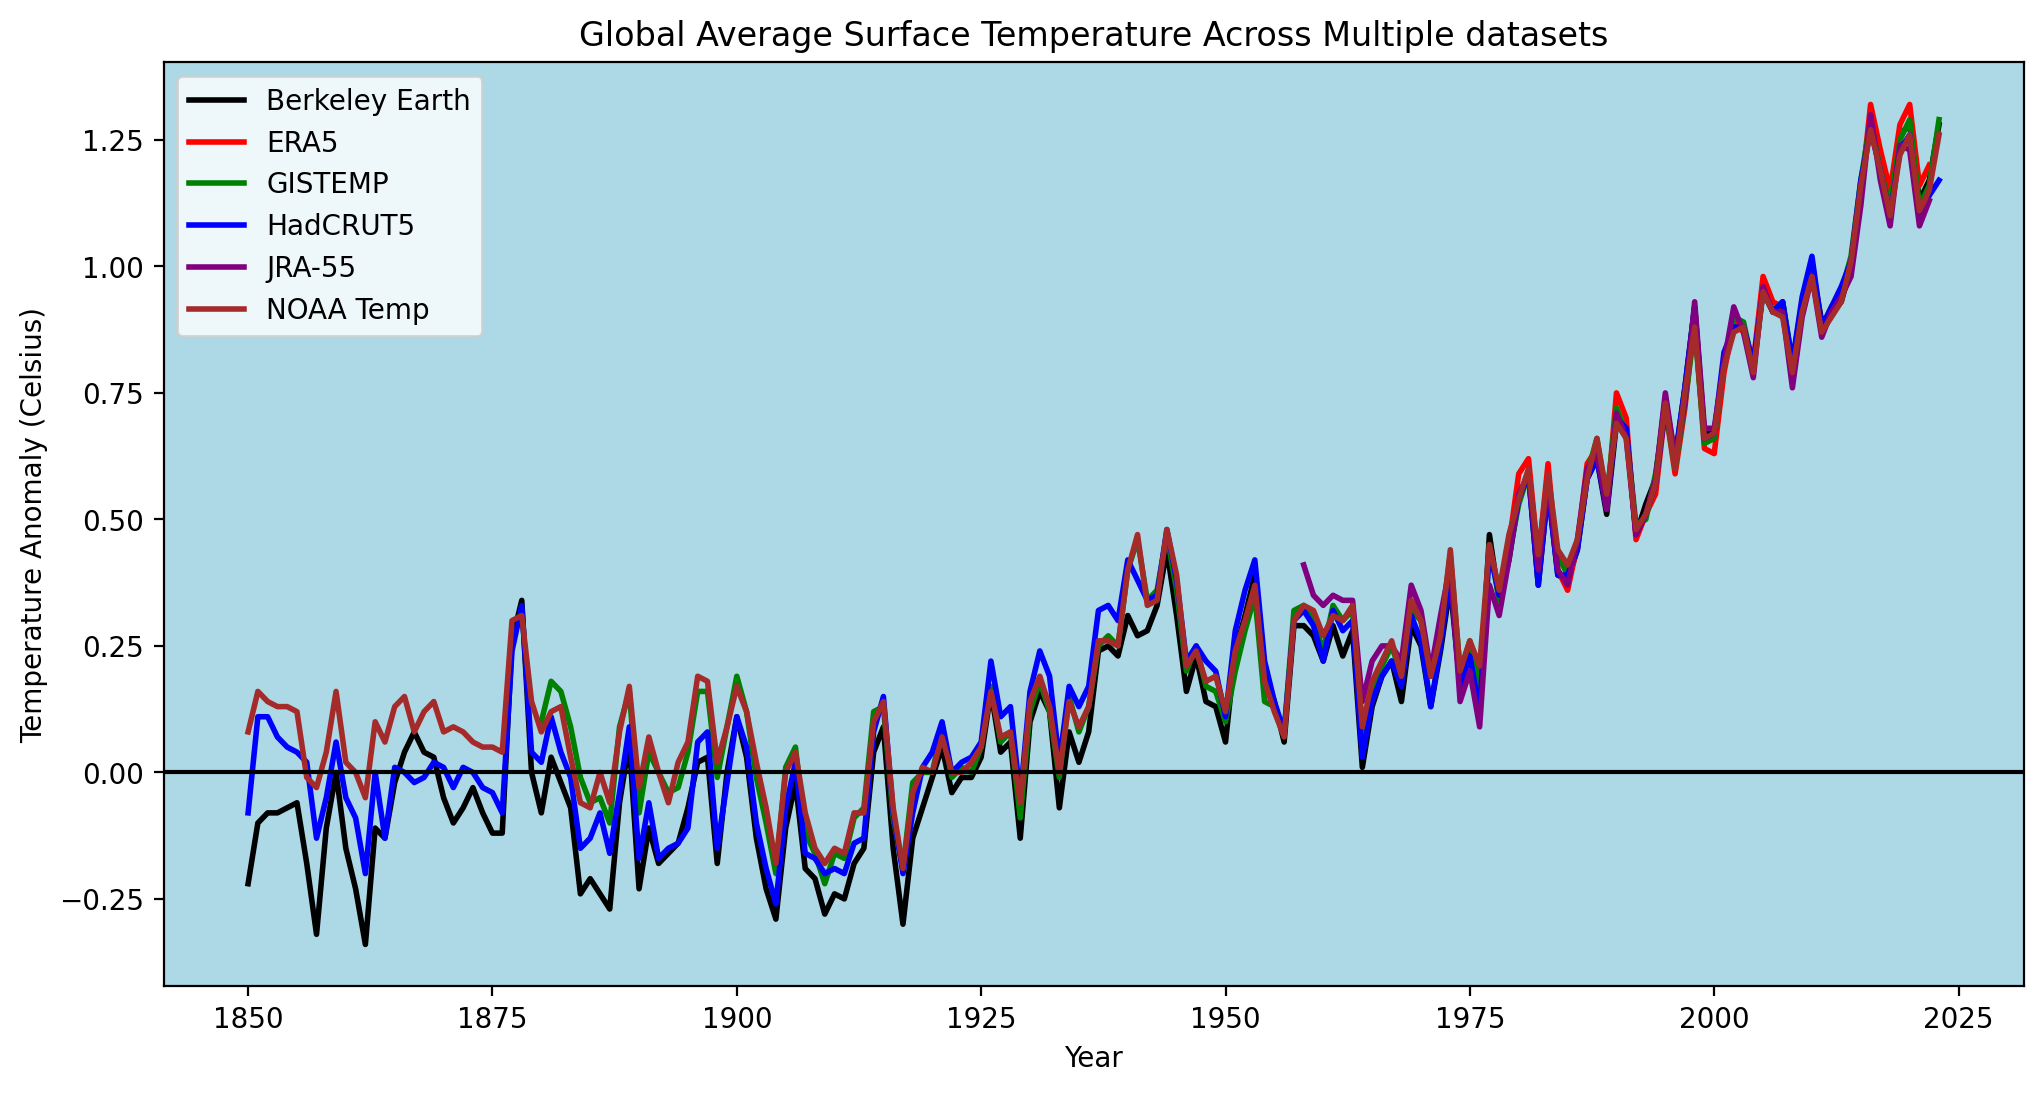

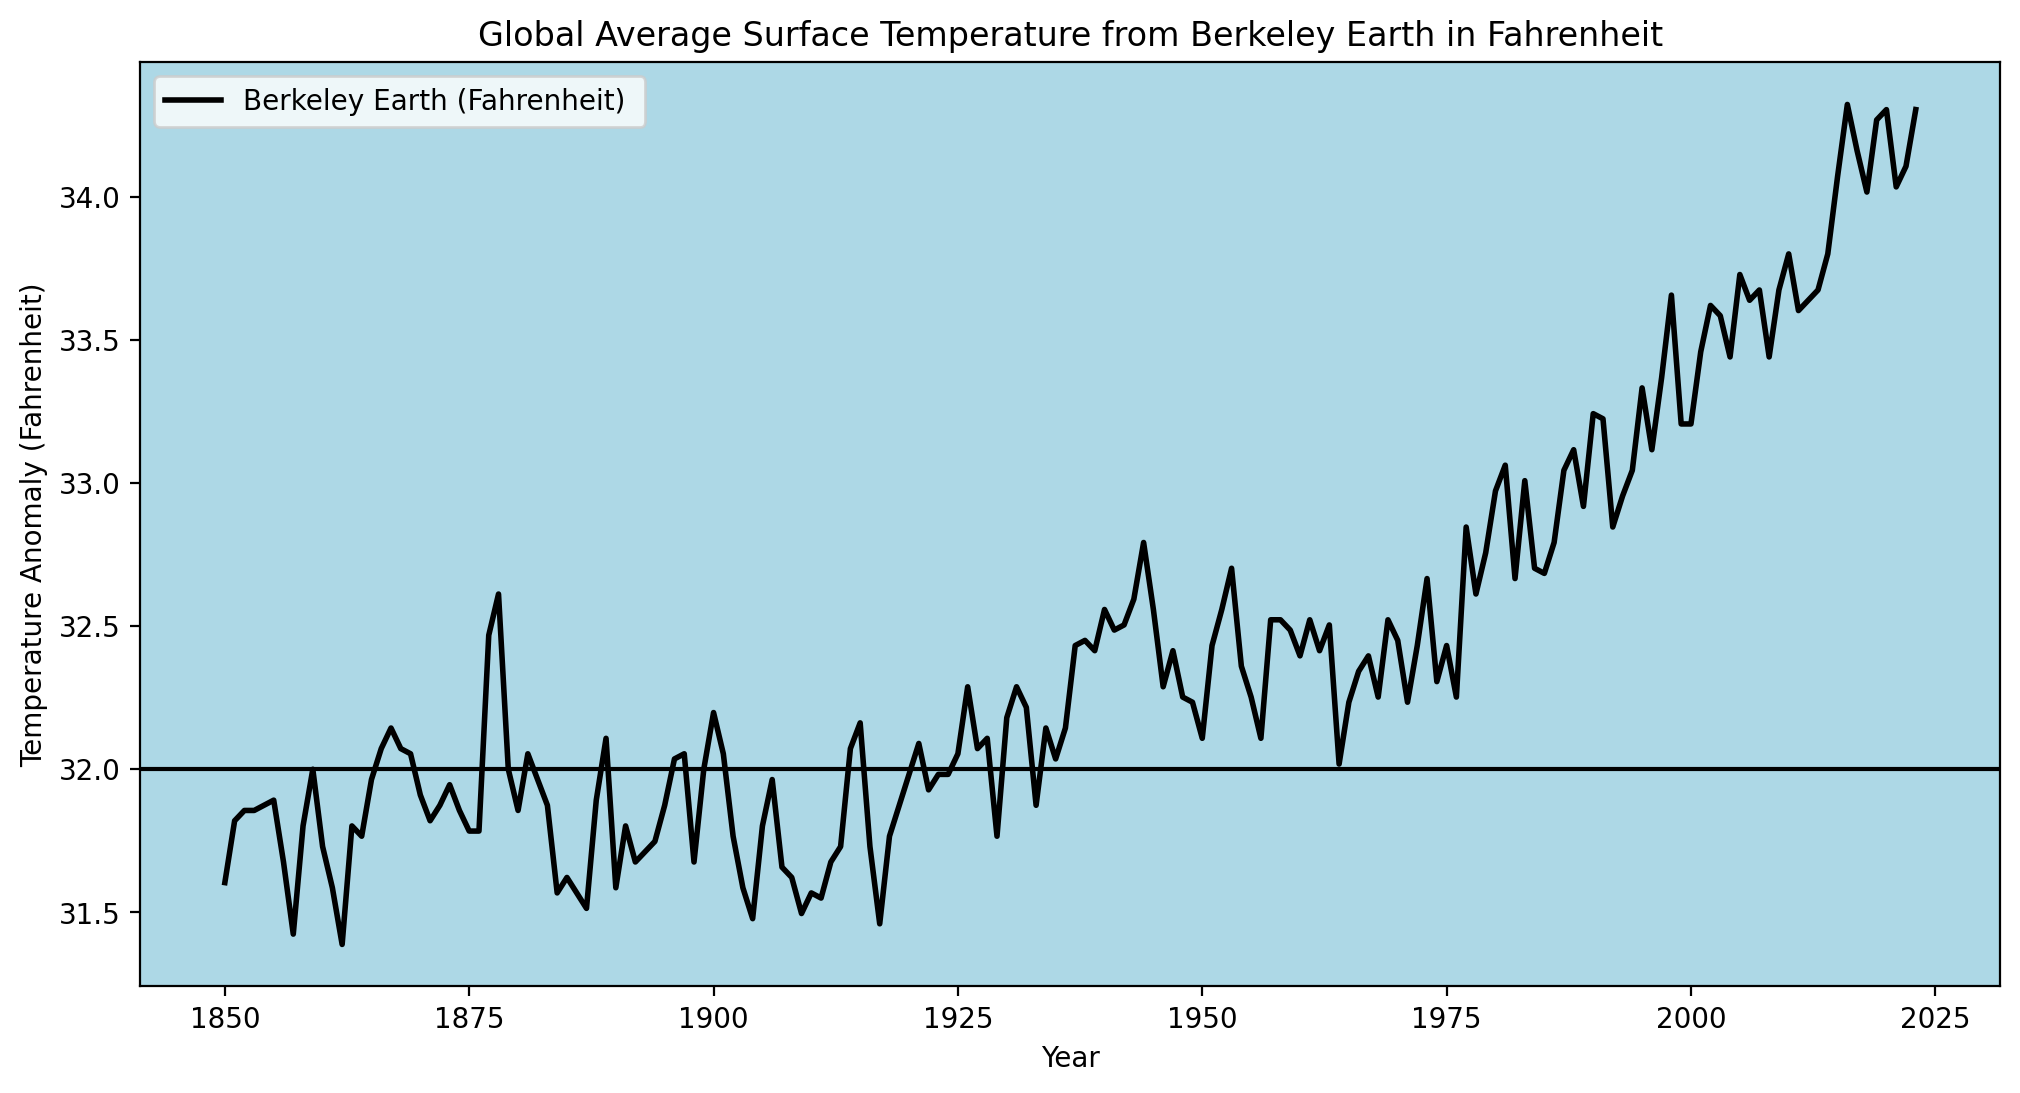

In [27]:
fig, ax = plt.subplots(figsize=(12,6))  #plot

#subplots for each temp data source
ax.plot(gmt_Berkeley_Earth['Year'],
        gmt_Berkeley_Earth['Berkeley Earth (degC)'],
        linewidth = 2, label = 'Berkeley Earth',
        color = 'black')

ax.plot(gmt_ERA5['Year'],
        gmt_ERA5['ERA5 (degC)'],
        linewidth = 2, label = 'ERA5',
        color = 'red')

ax.plot(gmt_GISTEMP['Year'],
        gmt_GISTEMP['GISTEMP (degC)'],
        linewidth = 2, label = 'GISTEMP',
        color = 'green')

ax.plot(gmt_HadCrut5['Year'],
        gmt_HadCrut5['HadCRUT5 (degC)'],
        linewidth = 2, label = 'HadCRUT5',
        color = 'blue')

ax.plot(gmt_JRA55['Year'],
        gmt_JRA55['JRA-55 (degC)'],
        linewidth = 2, label = 'JRA-55',
        color = 'purple')

ax.plot(gmt_NOAA_Global_Temp['Year'],
        gmt_NOAA_Global_Temp['NOAAGlobalTemp (degC)'],
        linewidth = 2, label = 'NOAA Temp',
        color = 'brown')

#legend
ax.legend() 

# title
ax.set_title('Global Average Surface Temperature Across Multiple datasets')

# axes labels
ax.set_ylabel('Temperature Anomaly (Celsius)')
ax.set_xlabel('Year')

#line at 0 (no temp anomaly)
ax.axhline(0,color='k')

#background color
ax.set_facecolor("lightblue")


fig, ax = plt.subplots(figsize=(12,6))  #plot, this time for degrees f

ax.plot(gmt_Berkeley_Earth['Year'],
        gmt_Berkeley_Earth_F,
        linewidth = 2, label = 'Berkeley Earth (Fahrenheit) ',
        color = 'black')
#legend
ax.legend() 

# title
ax.set_title('Global Average Surface Temperature from Berkeley Earth in Fahrenheit')

# axes labels
ax.set_ylabel('Temperature Anomaly (Fahrenheit)')
ax.set_xlabel('Year')

#line at 32 (baseline, no temp anomaly)
ax.axhline(32,color='k')

#background color
ax.set_facecolor("lightblue")

**Figure 15**: Global average surface temperature data, displayed as temperature anomaly from baseline in degrees celsius. The first graph combines multiple datasets, including Berkeley Earth, ERA5, GISTEMP, HadCRUT5, JRA-55, and NOAA Temp. While each temperature dataset is collected independently, and some variation is apparent, all of the datasets agree that temperature has risen by over a degree celsius since 1850. The second graph shows a conversion to Fahrenheit, using the Berkeley Earth data as a representation of overall temperature data. In the Fahrenheit graph, 32 degrees fahrenheit is equal to 0 degrees celsius. 

#  <span style="color:red"> #13
As seen in the graphs above, relative to the baseline of all the datasets global average temperature have risen by about 1.25 degrees Celsius (over 2 degrees Fahrenheit). While there is some variability with each dataset, they are all in agreement in the amount that the average surface temperature has increased.

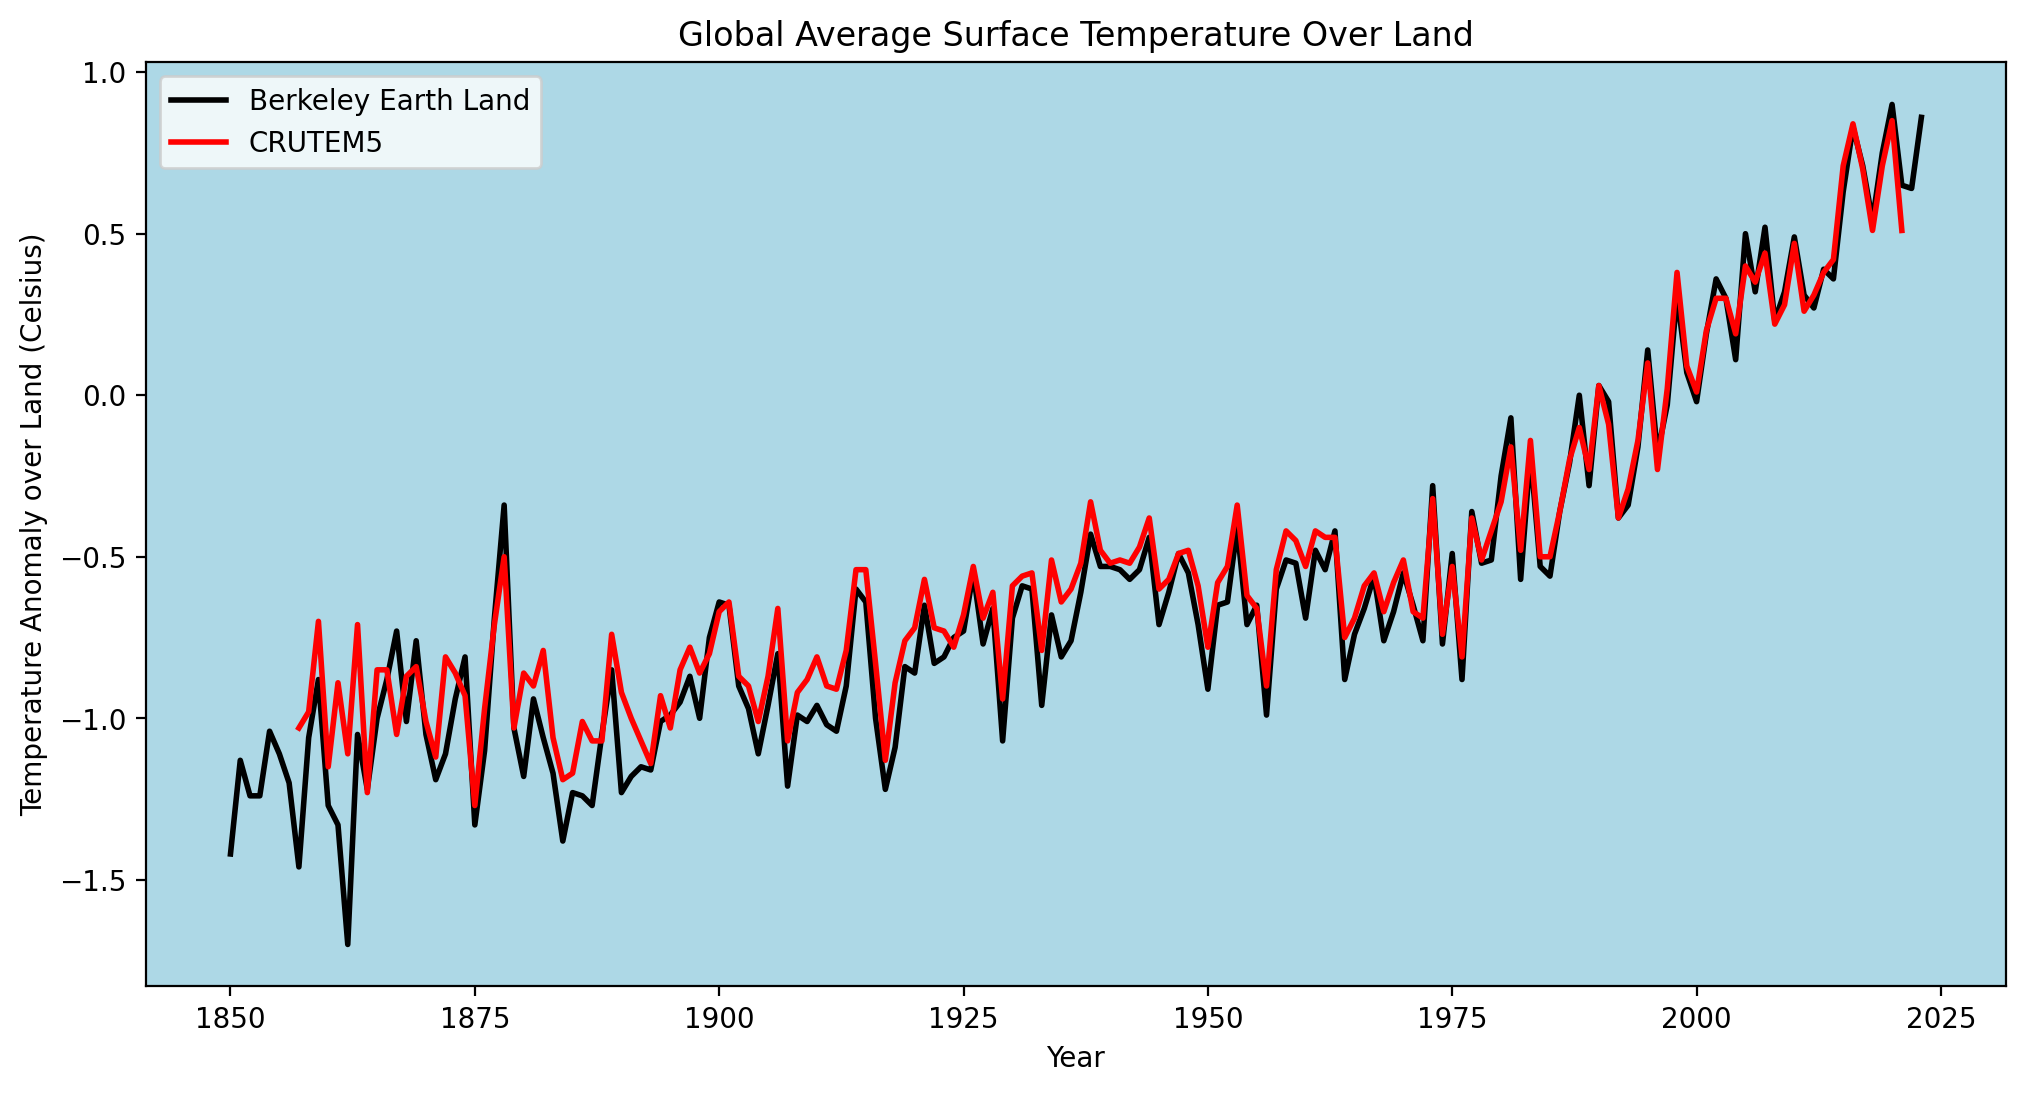

In [31]:
fig, ax = plt.subplots(figsize=(12,6))  #plot, this time for overland data

#subplots for each source
ax.plot(lsat_Berkeley_Earth_Land['Year'],
        lsat_Berkeley_Earth_Land['Berkeley Earth Land (degC)'],
        linewidth = 2, label = 'Berkeley Earth Land',
        color = 'black')

ax.plot(lsat_CRUTEM5['Year'],
        lsat_CRUTEM5['CRUTEM5 (degC)'],
        linewidth = 2, label = 'CRUTEM5',
        color = 'red')

#legend
ax.legend() 

# title
ax.set_title('Global Average Surface Temperature Over Land')

# axes labels
ax.set_ylabel('Temperature Anomaly over Land (Celsius)')
ax.set_xlabel('Year')

#background color
ax.set_facecolor("lightblue")

**Figure 16**: Global average surface temperature anomaly over land. These two datasets, from Berkeley Earth and CRUTEM5, display the ammount in degrees celsius that average land temperature have changed since 1850. Some variability is present, but the overall warming trend is apparent.

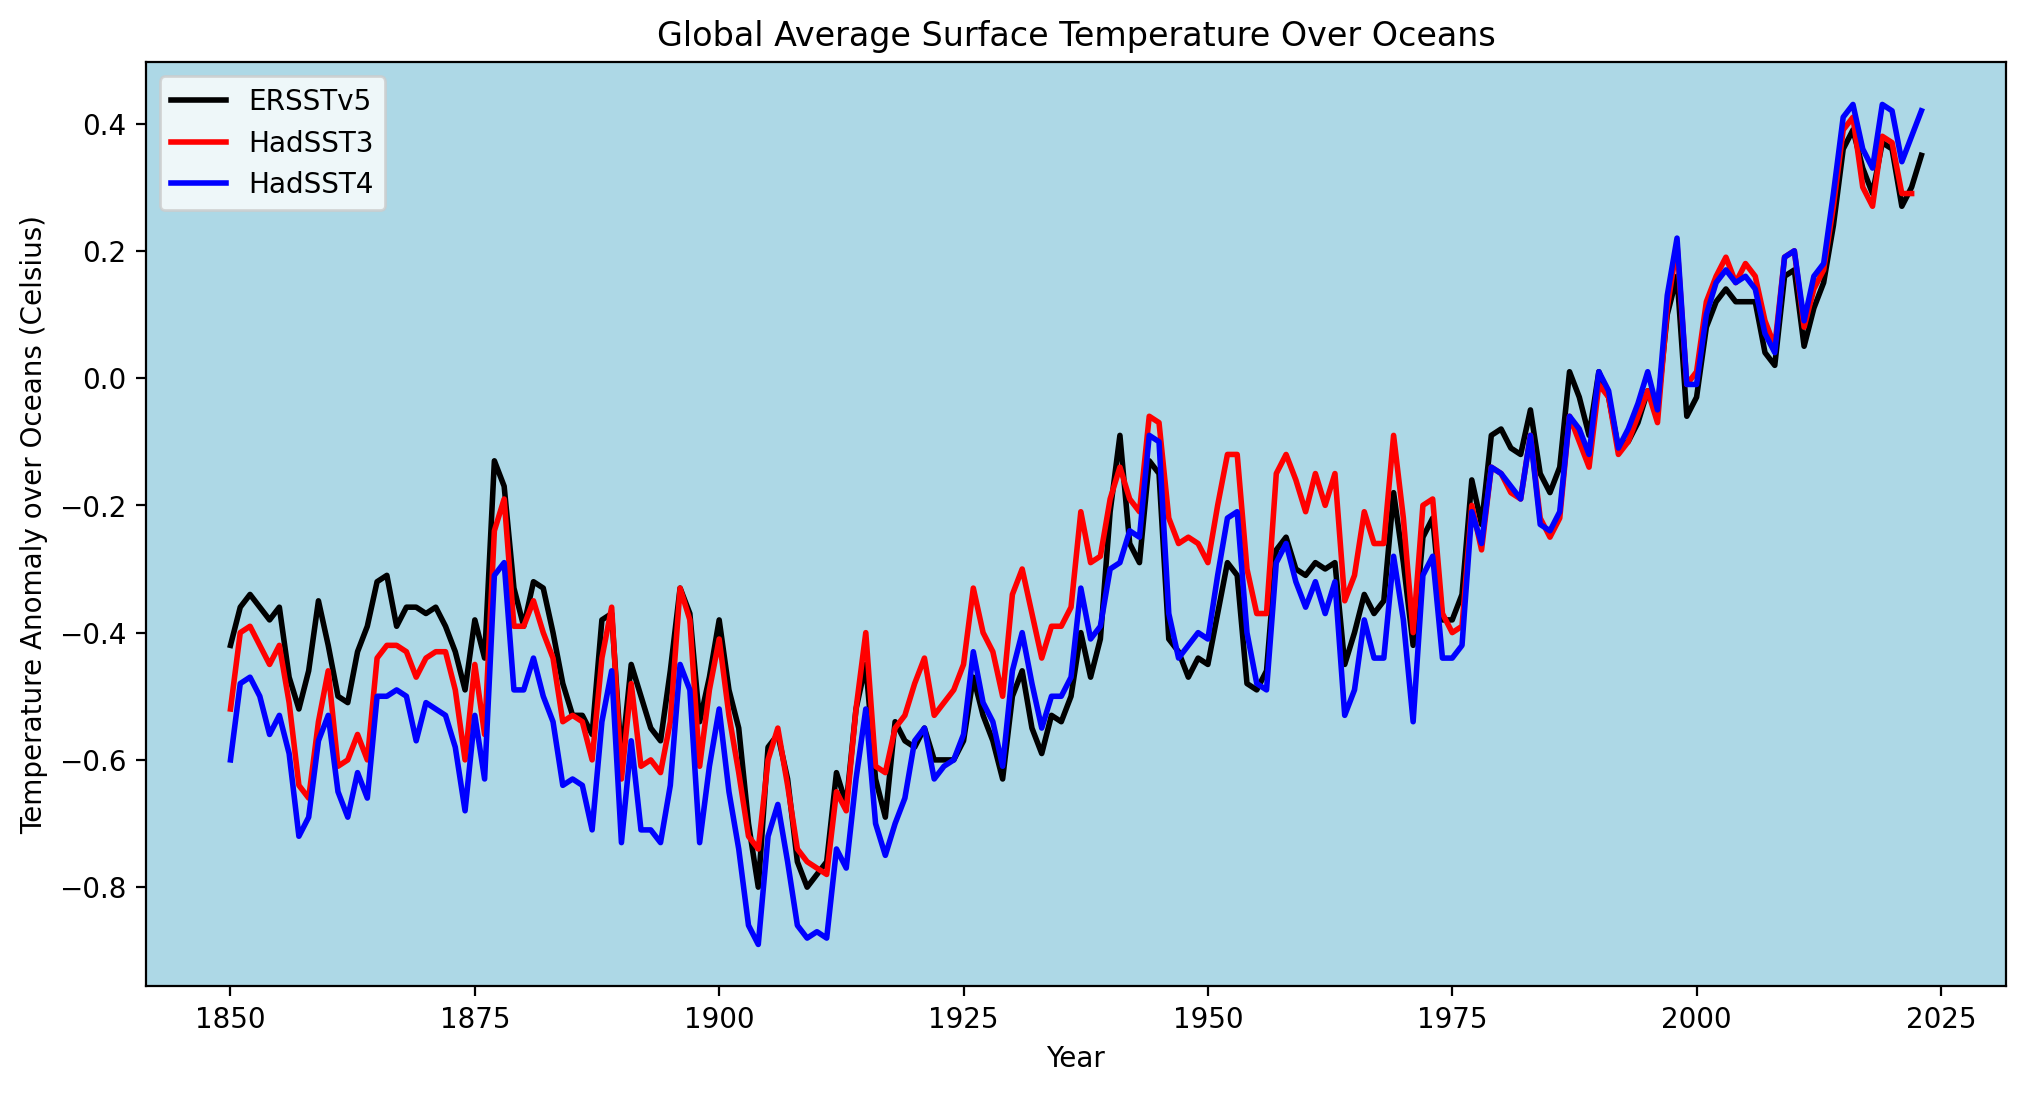

In [30]:
fig, ax = plt.subplots(figsize=(12,6))  #plot, this time for overseas data

#subplots for each source
ax.plot(sst_ERSSTv5['Year'],
        sst_ERSSTv5['ERSSTv5 (degC)'],
        linewidth = 2, label = 'ERSSTv5',
        color = 'black')

ax.plot(sst_HadSST3['Year'],
        sst_HadSST3['HadSST3 (degC)'],
        linewidth = 2, label = 'HadSST3',
        color = 'red')

ax.plot(sst_HadSST4['Year'],
        sst_HadSST4['HadSST4 (degC)'],
        linewidth = 2, label = 'HadSST4',
        color = 'blue')

#legend
ax.legend() 

# title
ax.set_title('Global Average Surface Temperature Over Oceans')

# axes labels
ax.set_ylabel('Temperature Anomaly over Oceans (Celsius)')
ax.set_xlabel('Year')


#background color
ax.set_facecolor("lightblue")

**Figure 16**: Global average surface temperature anomaly over the Earths oceans. This graph reflects the amount of temperature change experienced by the Earth's oceans in degrees celsius since 1850. The datasets included are ERSSTv5, HadSST3, and HadSST4. The general trend of rising sea surface temperature is supported by all three datasets. Interestingly, the amount of temperature rise is much different in comparison to the global average and average land temperatures. 

#  <span style="color:red"> #14
As seen in the graphs above (figures 15 and 16), land area around the globe is heating up much faster than ocean temperatures. The reason for that has to do with a difference in heat capacity. Heat capacity refers to the amount of "heat" or energy that is required to raise the temperature of a substance. Water has a relatively high heat capacity, and so the oceans are able to absorb much more energy before rising in temperature, which is why the rate of temperature increase is much higher over land. <br>
Source: https://www.carbonbrief.org/guest-post-why-does-land-warm-up-faster-than-the-oceans/

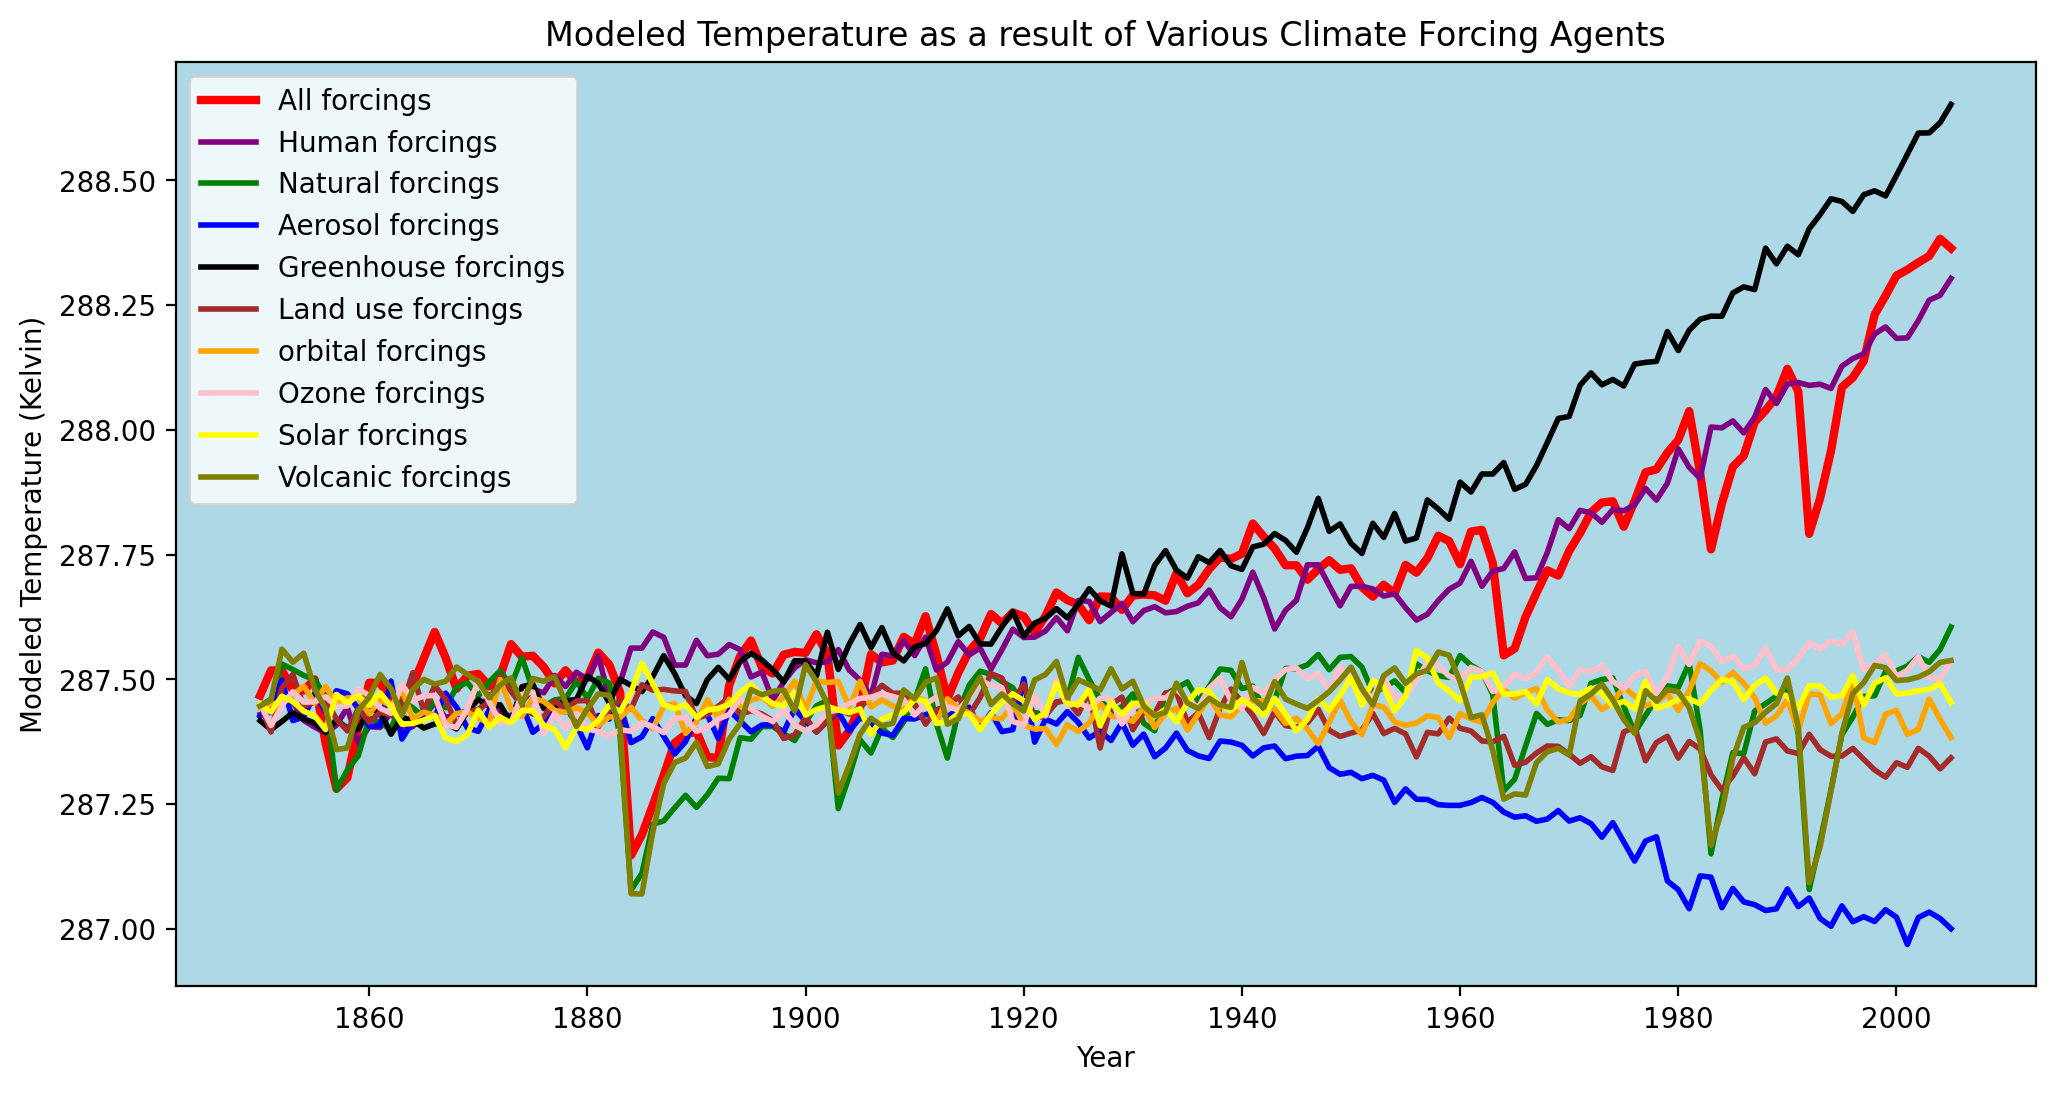

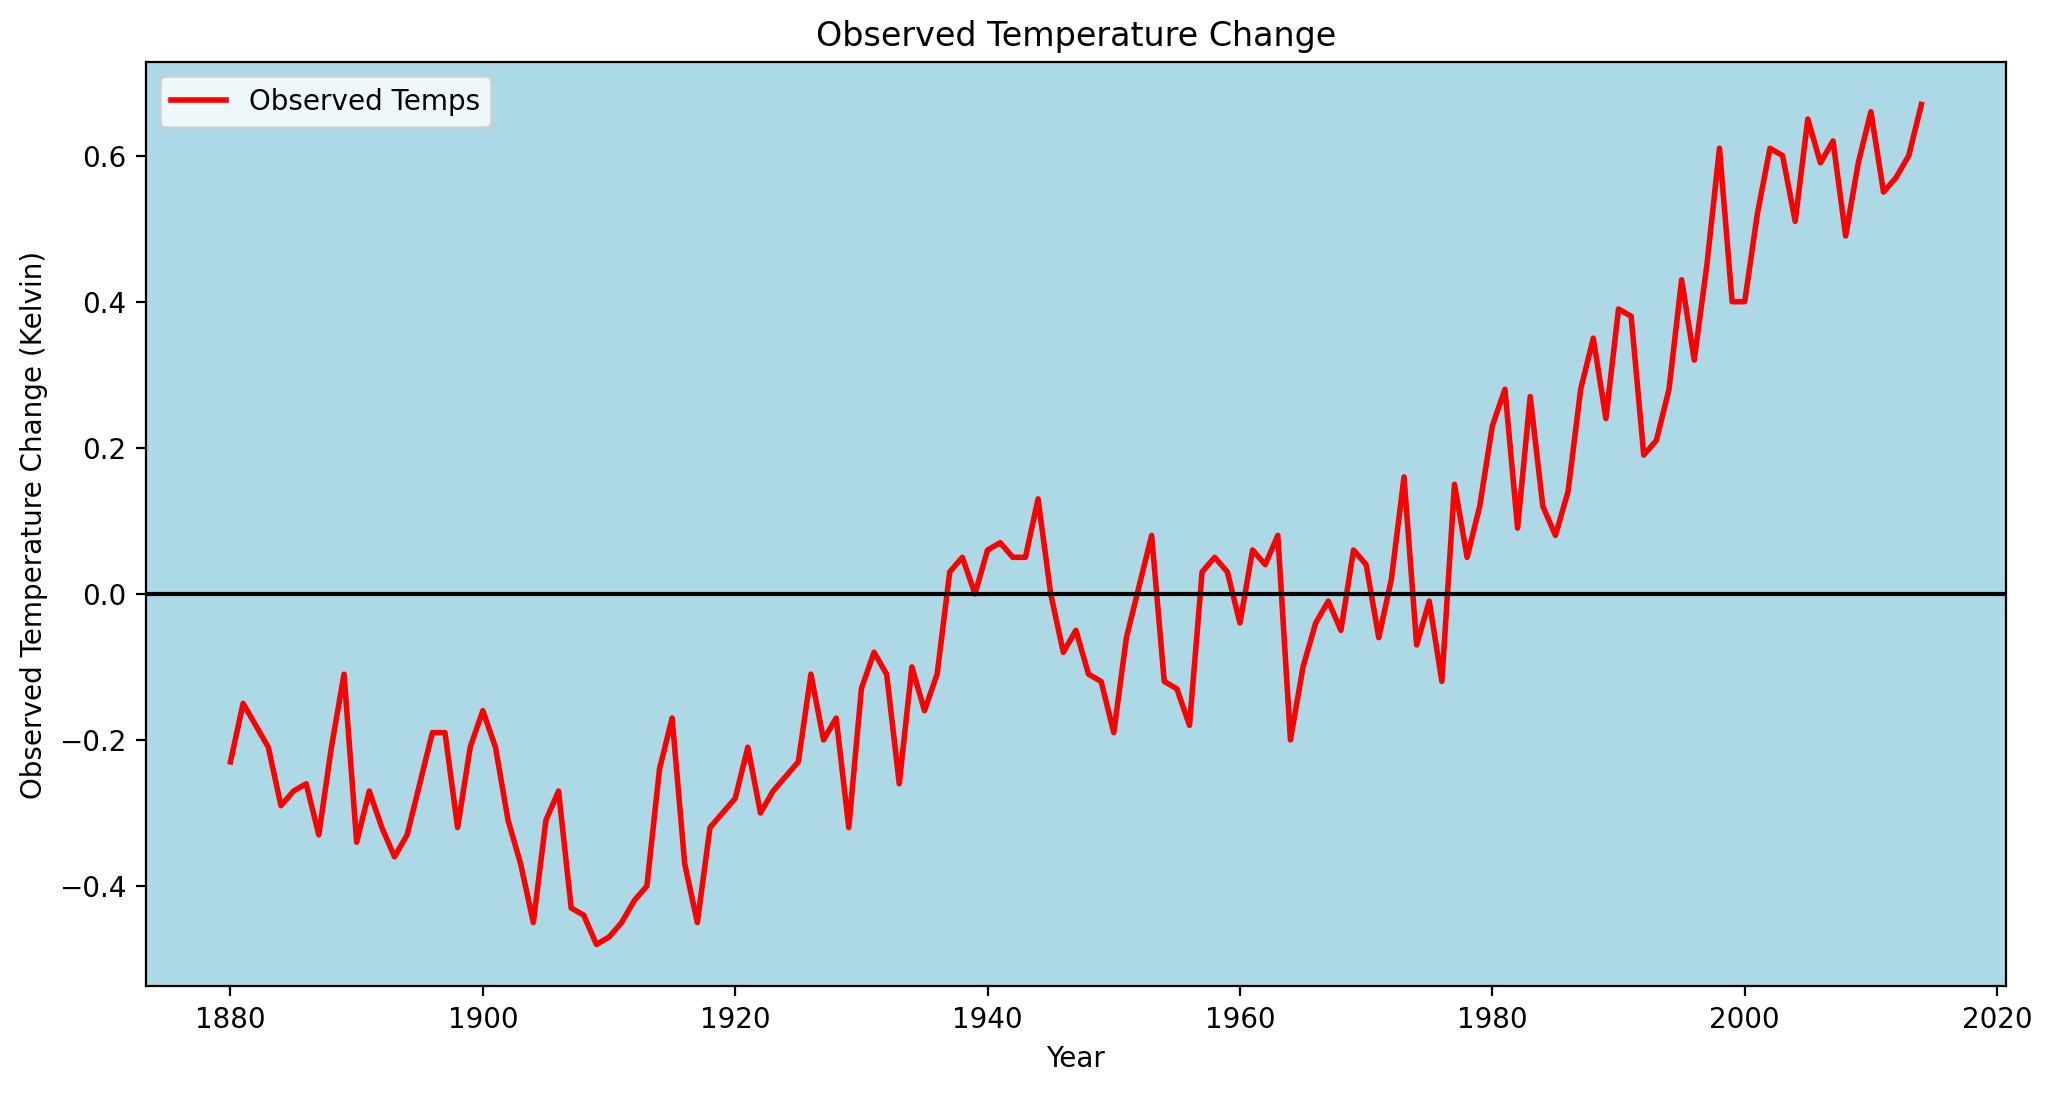

In [32]:
fig, ax = plt.subplots(figsize=(12,6))  #plot

#plot of model
ax.plot(NASA_GISS_Responce_To_Forcings['Year'],
        NASA_GISS_Responce_To_Forcings['All forcings'],
        linewidth = 3, label = 'All forcings',
        color = 'red')

ax.plot(NASA_GISS_Responce_To_Forcings['Year'],
        NASA_GISS_Responce_To_Forcings['Human'],
        linewidth = 2, label = 'Human forcings',
        color = 'purple')

ax.plot(NASA_GISS_Responce_To_Forcings['Year'],
        NASA_GISS_Responce_To_Forcings['Natural'],
        linewidth = 2, label = 'Natural forcings',
        color = 'green')

ax.plot(NASA_GISS_Responce_To_Forcings['Year'],
        NASA_GISS_Responce_To_Forcings['Anthropogenic tropospheric aerosol'],
        linewidth = 2, label = 'Aerosol forcings',
        color = 'blue')

ax.plot(NASA_GISS_Responce_To_Forcings['Year'],
        NASA_GISS_Responce_To_Forcings['Greenhouse gases'],
        linewidth = 2, label = 'Greenhouse forcings',
        color = 'black')

ax.plot(NASA_GISS_Responce_To_Forcings['Year'],
        NASA_GISS_Responce_To_Forcings['Land use'],
        linewidth = 2, label = 'Land use forcings',
        color = 'brown')

ax.plot(NASA_GISS_Responce_To_Forcings['Year'],
        NASA_GISS_Responce_To_Forcings['Orbital changes'],
        linewidth = 2, label = 'orbital forcings',
        color = 'orange')

ax.plot(NASA_GISS_Responce_To_Forcings['Year'],
        NASA_GISS_Responce_To_Forcings['Ozone'],
        linewidth = 2, label = 'Ozone forcings',
        color = 'pink')

ax.plot(NASA_GISS_Responce_To_Forcings['Year'],
        NASA_GISS_Responce_To_Forcings['Solar'],
        linewidth = 2, label = 'Solar forcings',
        color = 'yellow')

ax.plot(NASA_GISS_Responce_To_Forcings['Year'],
        NASA_GISS_Responce_To_Forcings['Volcanic'],
        linewidth = 2, label = 'Volcanic forcings',
        color = 'olive')

#legend
ax.legend() 

# title
ax.set_title('Modeled Temperature as a result of Various Climate Forcing Agents')

# axes labels
ax.set_ylabel('Modeled Temperature (Kelvin)')
ax.set_xlabel('Year')

#background color
ax.set_facecolor("lightblue")

fig, ax = plt.subplots(figsize=(12,6))  #secondary plot of observed temp data, for comparison to model

#plot of observed temps for comparison to model
ax.plot(Observed_Temps['Year'],
        Observed_Temps['Annual_Mean'],
        linewidth = 2, label = 'Observed Temps',
        color = 'red')


#legend
ax.legend() 

# title
ax.set_title('Observed Temperature Change')

# axes labels
ax.set_ylabel('Observed Temperature Change (Kelvin)')
ax.set_xlabel('Year')

#line at 0 (no temp anomaly)
ax.axhline(0,color='k')

#background color
ax.set_facecolor("lightblue")


**Figure 17**: These graphs show the modeled temperature as a result of forcing (top graph) and observed temperature data anomoly (bottom graph), both in degrees kelvin. The observed temperature anomaly is presented for use as a comparison to the modeled experiment. The model is provided by NASA GISS ModelE2 developed as 
NASA’s Goddard Institute for Space Studie, and runs from 1850-2005. The thick red line in the model graph shows the sum of all forcings, which are the other colorful lines in the graph. Some forcing agents will increase the total modeled temperature, while others may reduce it. The total effect is largly a result of human activity and greenhouse gases.s 

#  <span style="color:red"> #15
The various forcing agents depicted above have different effects on the modeled (predicted) temperature of the Earths surface. Some agents act to raise the temperature, while others may lower it. Generally speaking, the sum of the forcings, which is labeled as "all forcings" above, show an increase that agrees with oberved temperature data. Human forcings closely follow this trend, showing that human forcings overall tend to drive temperature up. Natural forcing agents are fairly consistent, not contributing to a great influence, with some events that subtract from the general forcing trend. Similarly, solar, orbital, ozone, land use, and volcanic forcings present a relatively stable forcing influence that does no evoke much change in the modeled temperature. Volcanic agents reflect the drastic subtractions, which is a result of eruptions reflecting more radiating and helping to reduce the overall temperature. Aerosol forcing agents tend to reduce the contribution to temperature rise for a similar reason, in that they reflect more energy from the atmosphere back to space. The primary cause of the modeled temperature rise comes from greenhouse gases. The contribution from greenhouse gases would result in a temperature significantly higher than the model ultimately predicts, and this is because various other forcings counteract the effect of greenhouse gases to some extent. In the end, the effect of greenhouse gases is forcing a rise in the temperature as predicted by the model and supported by observed temperature data.

#  <span style="color:blue"> Conclusion
Without a doubt, the temperature of the Earth is increasing as a result of human influences. Greenhouse gases, which are emitted in high amounts due to human activity, are a driving force in this rising temperature. By entrapping more energy within the Earth's atmosphere, these gases throw the energy budget of the Earth out of balance, and allow for more heat to be retained than is re-emitted by the Earth. While the Earth's climate is complicated, with various events and seasonal controls causing temporal variability, the overall trend of rising temperature and heightened greenhouse gas concentrations is obvious. By understanding where these emissions are coming from, how they are effecting the climate, and by modeling the degree to which different factors effects the climate, solutions to climate change might be presented. If this issue goes unresolved, the global temperature will continue to rise, and this will have resounding effects on a multitude of other global climatic and weather agents. Inevitably, the resolution will involve getting a handle on the amount of greenhouse gases that are emitted into the atmosphere. 